------------------------------------------------
##### To check for NA values 
------------------------------------------------

In [1]:
def check_NAs(d):
    return d.isna().sum().sum()

------------------------------------------------
##### Importing necessary modules
------------------------------------------------

In [2]:
import pandas as pnd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import logging
logging.disable(logging.CRITICAL)
import random

import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors


import networkx as nx
from itertools import combinations
from collections import Counter




import os
from pathlib import Path
print(path:= Path.cwd())

diverging_palettes = ['coolwarm', 'RdBu', 'vlag', 'mako', 'rocket']
sequential_palettes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
unique_palettes = ['crest', 'twilight', 'twilight_shifted', 'turbo']

all_palettes = diverging_palettes + sequential_palettes + unique_palettes

print(all_palettes:= diverging_palettes + sequential_palettes + unique_palettes)

print(runtimeDPI := 200)

/Users/arifwaghbakriwala/Library/Mobile Documents/com~apple~CloudDocs/Northeastern/Projects/Sales-Analysis
['coolwarm', 'RdBu', 'vlag', 'mako', 'rocket', 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'crest', 'twilight', 'twilight_shifted', 'turbo']
200


------------------------------------------------
##### Listing all of the csv files in the directory, importing and appending each individual file. (Each ".csv" corresponds to a month of sales)
- Deselected all observations that had header values imputed as cell values
- removed all observations containing na values
- transfered the data-frame to the csv file.
------------------------------------------------

In [3]:
lst = sorted(Path.joinpath(path).joinpath('Data').glob('*.csv'))
lst = [l for l in lst if l.is_file()]

In [4]:
df = pnd.DataFrame()

for f in lst:
    tmp = pnd.read_csv(Path.joinpath(path).joinpath(f),encoding="cp1252",skip_blank_lines=True)
    df = pnd.concat([df,tmp])


df = df.loc[df["Product"] != "Product"]
df = df.dropna()
df.rename(columns={'Order ID': 'Order_ID', 'Product': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

fin_name = Path.joinpath(path).joinpath("Data/z_cumulative_data.csv")
df.to_csv(fin_name, index = False)
del df

------------------------------------------------
##### Loading the concatenated data
------------------------------------------------

In [5]:
# path = "/Users/arifwaghbakriwala/Desktop/Northeastern/Projects/Sales-Analysis/Data/"
fin_name = Path.joinpath(path).joinpath("Data/z_cumulative_data.csv")
data = pnd.read_csv(fin_name,skip_blank_lines=True, na_filter=True)

------------------------------------------------
#### Cleaning Step
##### Separating the "Order_Date" into "Date" and "Time", and then Splitting the "Date" into "Month", "Day" and "Year"
------------------------------------------------

In [6]:
data[["Date","Time"]] = data.Order_Date.str.split(expand=True)
data[["Month","Day","Year"]] = data.Date.str.split("/",expand=True)

data["Month"] = data["Month"].astype("int")
data["Day"] = data["Day"].astype("int")
data["Year"] = data["Year"].astype("int")

data["Revenue"] = data["Quantity_Ordered"] * data["Price_Each"]


data["Product"] = data["Product"].astype("string")
data["Product"] = data["Product"].str.strip()


------------------------------------------------
#### Cleaning Step
##### Splitting the "Purchase_Address" Column into "City", "State" and "Zip"
------------------------------------------------

In [7]:
data["City"] =  data["Purchase_Address"].str.split(", ", n = 2, expand = True)[1].str.strip()  
data[["State","Zip"]] = data["Purchase_Address"].str.split(", ", n = 2, expand = True)[2].str.strip().str.split(" ", expand = True)


------------------------------------------------
#### Cleaning Step
##### Converting Order Date into Date time format and creating indvidual hours and minutes column
------------------------------------------------

In [8]:
'''
Converting the type of order date variable into datetime format and then extracting hours and minutes from 
the order date variable as individual variables
'''
data["Order_Date"] = pnd.to_datetime(data["Order_Date"])
data["Hours"] = data["Order_Date"].dt.hour
data["Minutes"] = data["Order_Date"].dt.minute

### VISUALISATIONS

------------------------------------------------
# VIZ 1 
##### Visualising Sales in terms of Quantity of Items Sold in each Month.
------------------------------------------------

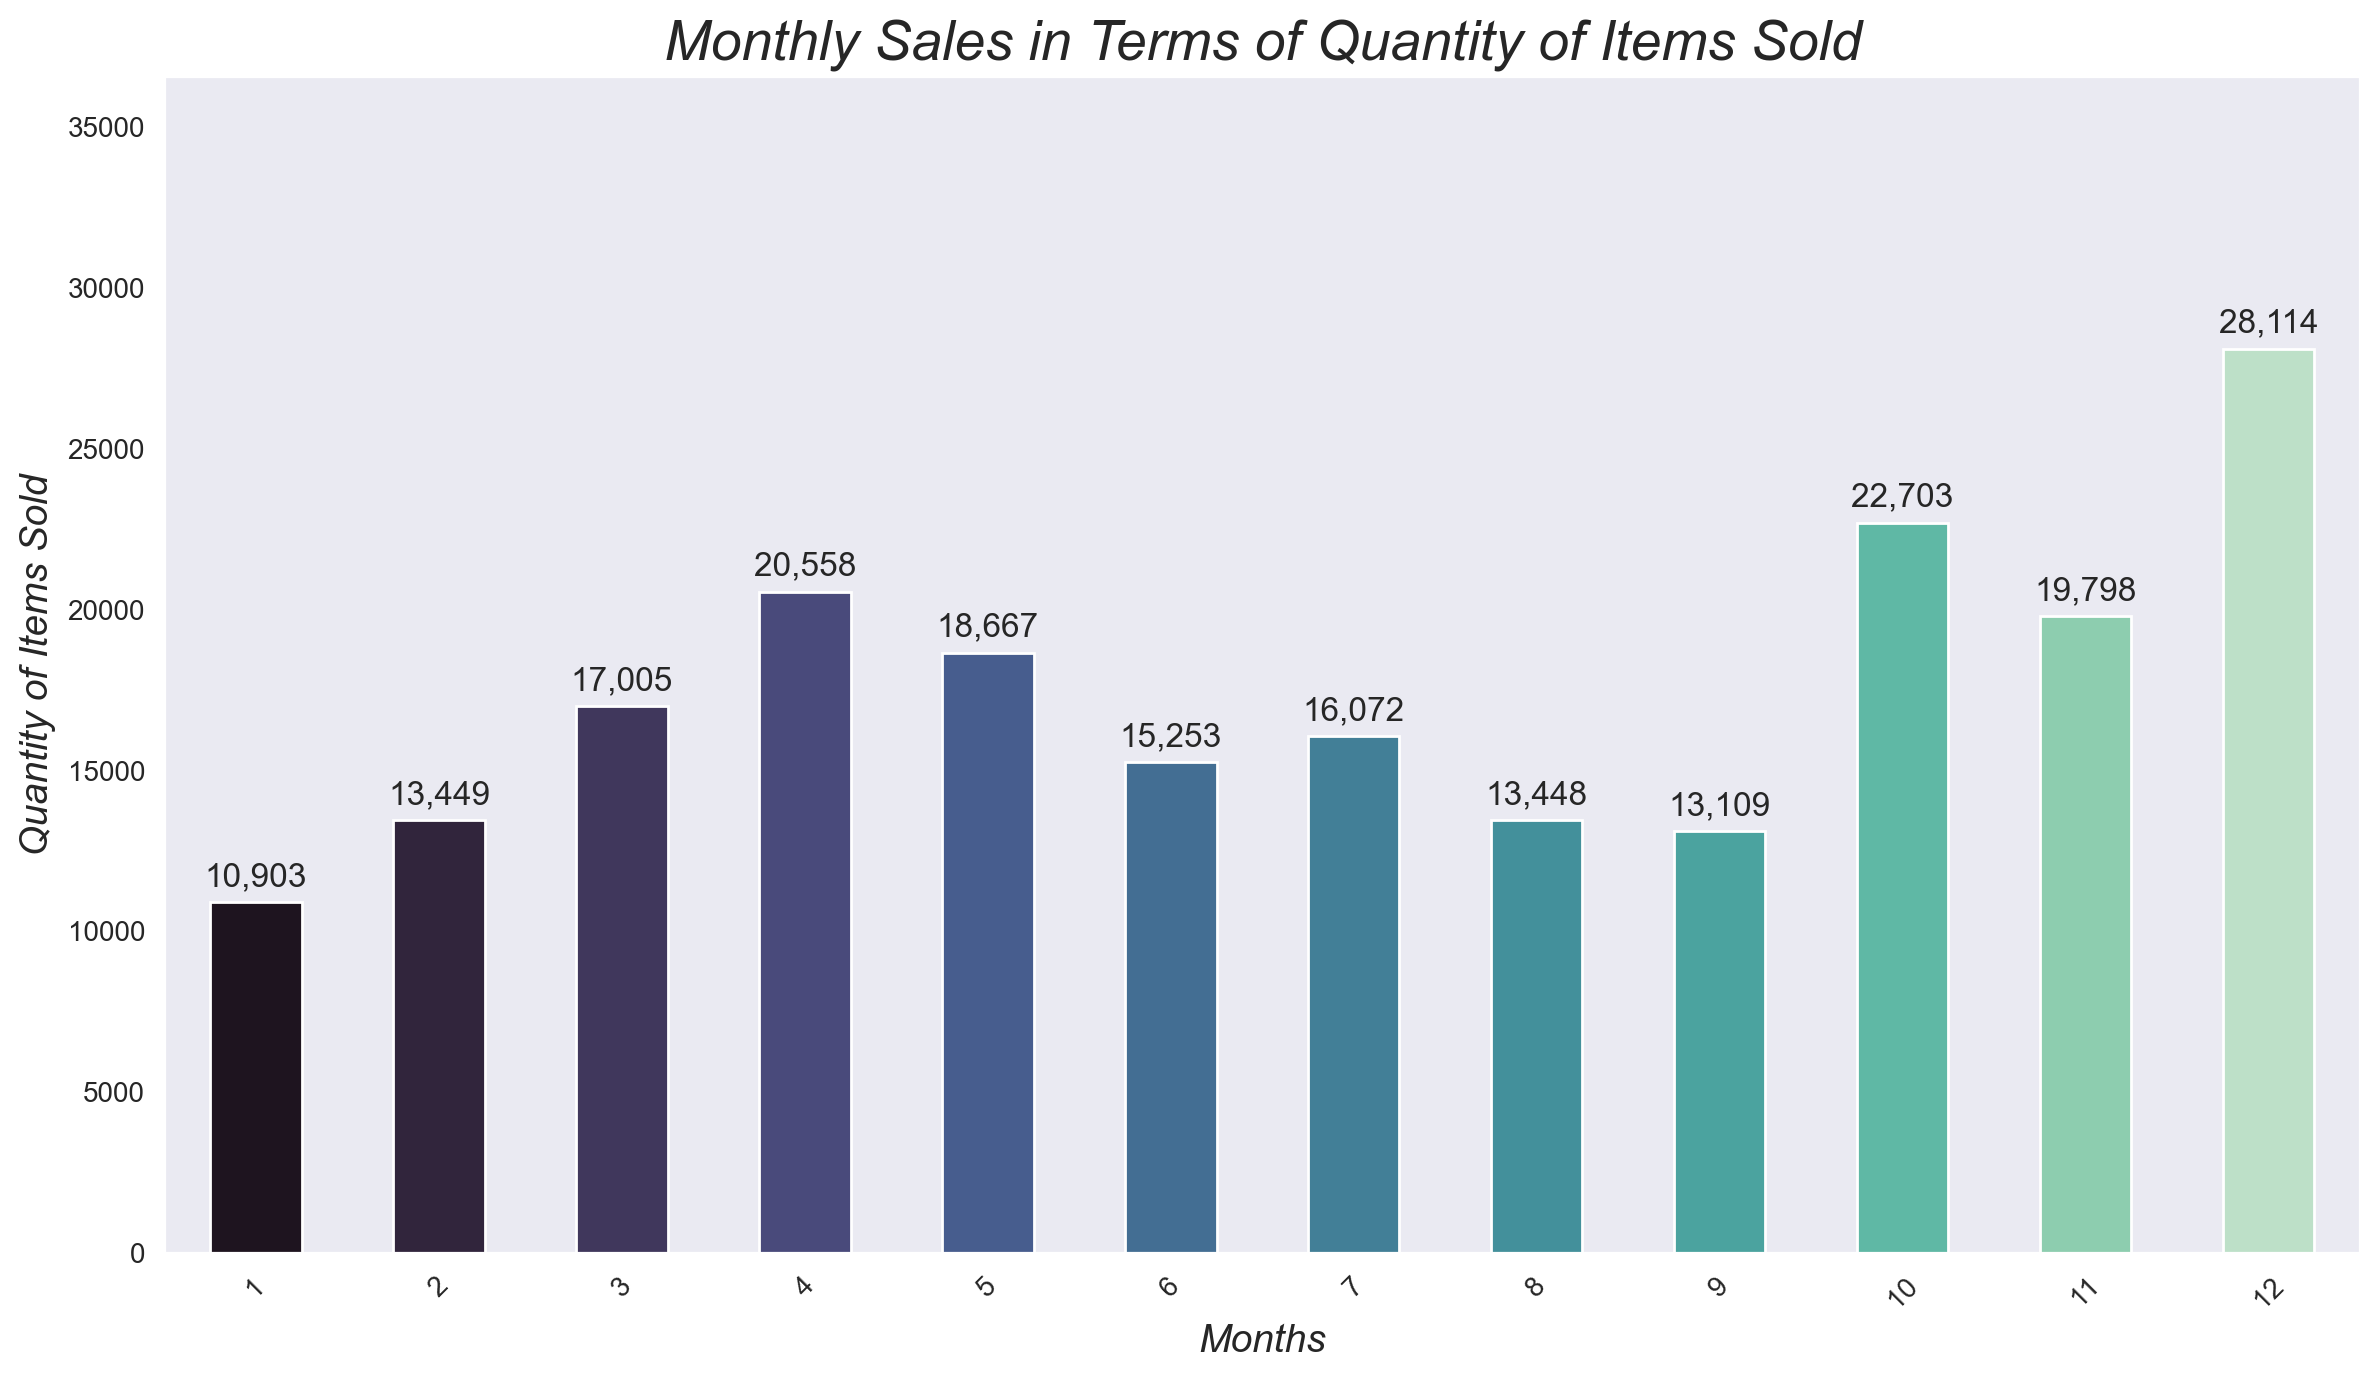

In [9]:
# Sample DataFrame
temporary_storage_1 = pnd.DataFrame(data.groupby('Month')['Quantity_Ordered'].sum())

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)

# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_1['Quantity_Ordered'].max() * 1.3) 

barplot = sns.barplot(x=temporary_storage_1.index, y=temporary_storage_1['Quantity_Ordered'],  width=0.5, palette=random.choice(all_palettes))

# Adding values on top of bars
for index, value in enumerate(temporary_storage_1['Quantity_Ordered']):
    barplot.text(index, value + 500, f'{value:,}', ha="center", fontsize=12)

# Adding labels and title
plt.xlabel("Months", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("Quantity of Items Sold", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("Monthly Sales in Terms of Quantity of Items Sold", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [Quantity of items sold each month]

`The bar chart above clearly shows that highest amount of deliveries made or the number of people served were in Decemeber, probably higher demand due to christmas celebrations and vacations period. Also, significantly high sales can be observed in 10th month, which is month of October, maybe high sales due to the fact that this month had a thanksgiving break and celebrations and bonuses recieved resulted in accomplishing more needs.`

------------------------------------------------
# VIZ 2
##### Visualising Sales in terms of Revenue Generated each Month.
------------------------------------------------

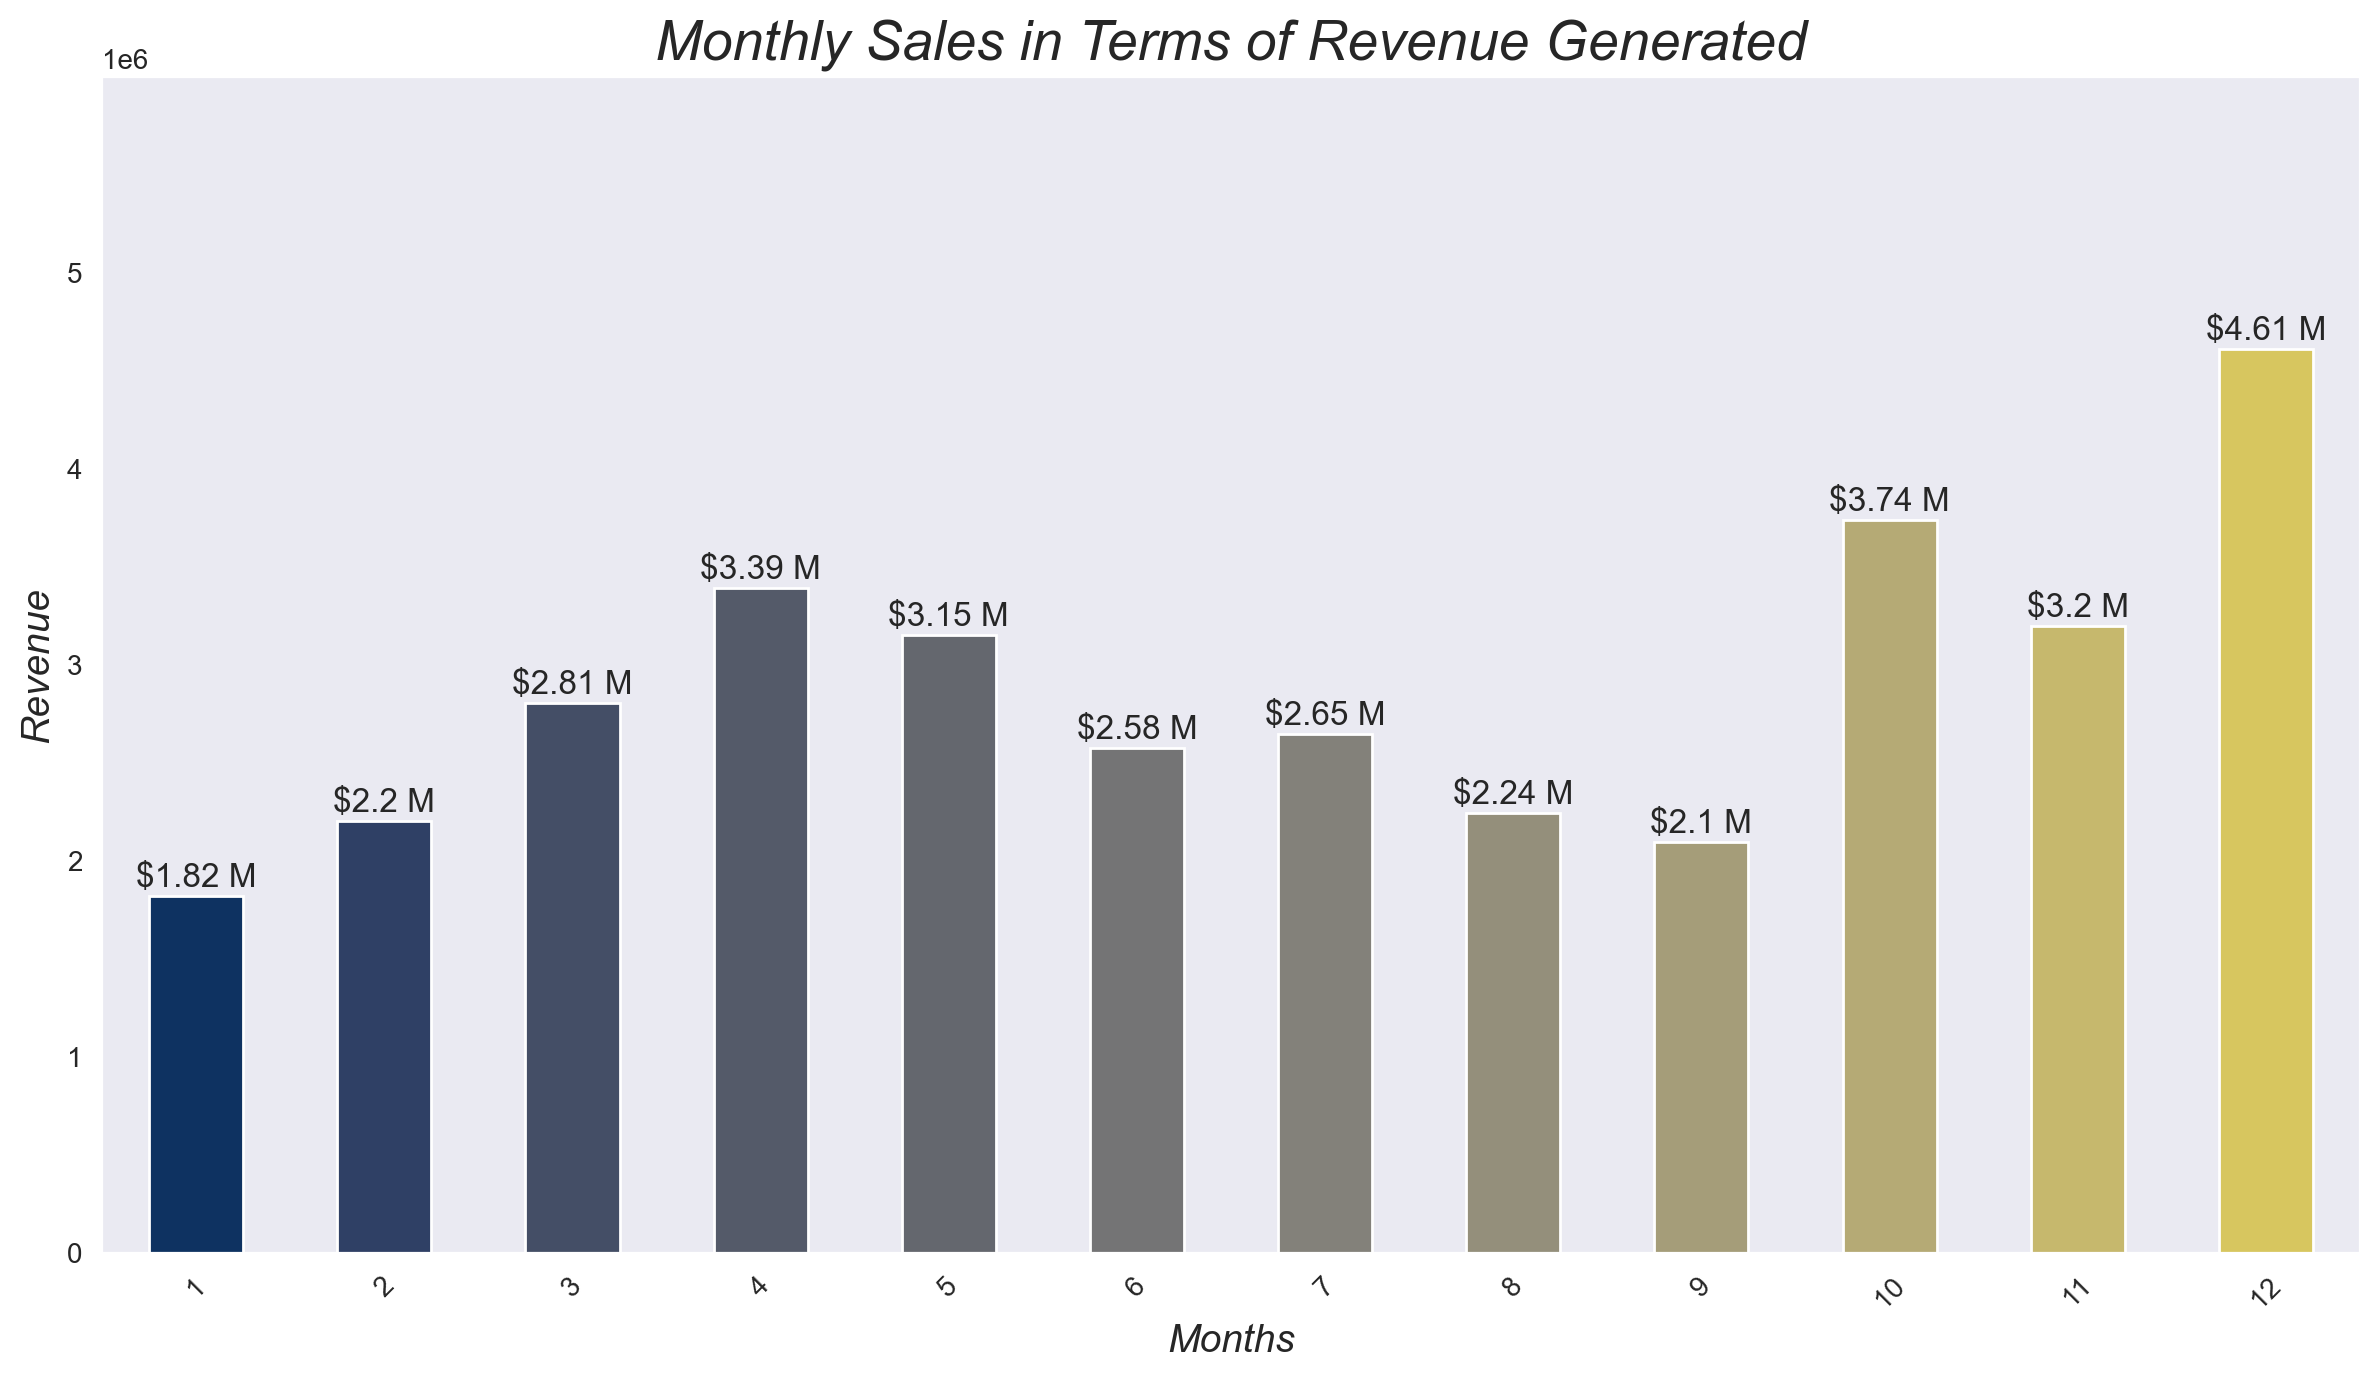

In [10]:
# Sample DataFrame
temporary_storage_2 = pnd.DataFrame(data.groupby('Month')['Revenue'].sum())

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12,7), dpi= runtimeDPI)

# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_2['Revenue'].max() * 1.3) 

barplot = sns.barplot(x=temporary_storage_2.index, y=temporary_storage_2['Revenue'], palette=random.choice(all_palettes),  width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_2['Revenue']):
    plt.text(index, value + 10000, "$" + str(round(value/1000000, 2)) + " M", ha='center', va='bottom', fontweight=500, size=12)
    # barplot.text(index, value + 500, f'{value:,}', ha="center", fontsize=12)

# Adding labels and title
plt.xlabel("Months", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("Revenue", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("Monthly Sales in Terms of Revenue Generated", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [Revenue Generated each month]

`As can be manifested from the above pictorial representation of the sales in terms of revenue generated, the trend pattern completely follows the prior bar chart depicting sales in terms of Quantity of items sold each month. The more the number of items sold, the greater the revenue generated. And all the larger amount of sales and revennue generation can be observed in the months of holidays, following the order : Christmas holidays bringing in the largest chunk of profits, followed by the earnings of Thanksgiving and then the takings of the SUMMERS.`

In [11]:
# Dear Hiring Manager/Recruiter,

# I am a Grad Student who will graduate this December 16th, 2023 with a Master's Degree in Data Science. I have the expertise and all functional knowledge specified in this Job Description, additionally I also possess academic and professional experience justified. I am willing to relocate and attend office in-person as much as required. I am very flexible with it. If possible, can we please hop on a quick call and discuss more in-detail about the role and how my experiences align well with it. I would be more than grateful for any time you could possibly spare. Thank you so much for reading through this. Attached with this application is my resume for your reference. 

# Warm Regards,
# Arif Waghbakriwala
# +1 617 417 3729
# arifwaghbakriwala97@gmail.com


------------------------------------------------
# VIZ 3
##### Visualising Sales City Wise (w.r.t quantity of items).
- Boston, Massaschussetts (MA)
- Portland, Maine (ME)
- Portland, Oregon (OR)
- San Francisco, California (CA)
- Los Angeles, California (CA)
- Austin, Texas (TX)
- Atlanta, Georgia (GA)
- Seattle, Washington (WA)
- New York City, New York (NY)
- Dallas, Texas (TX)
------------------------------------------------

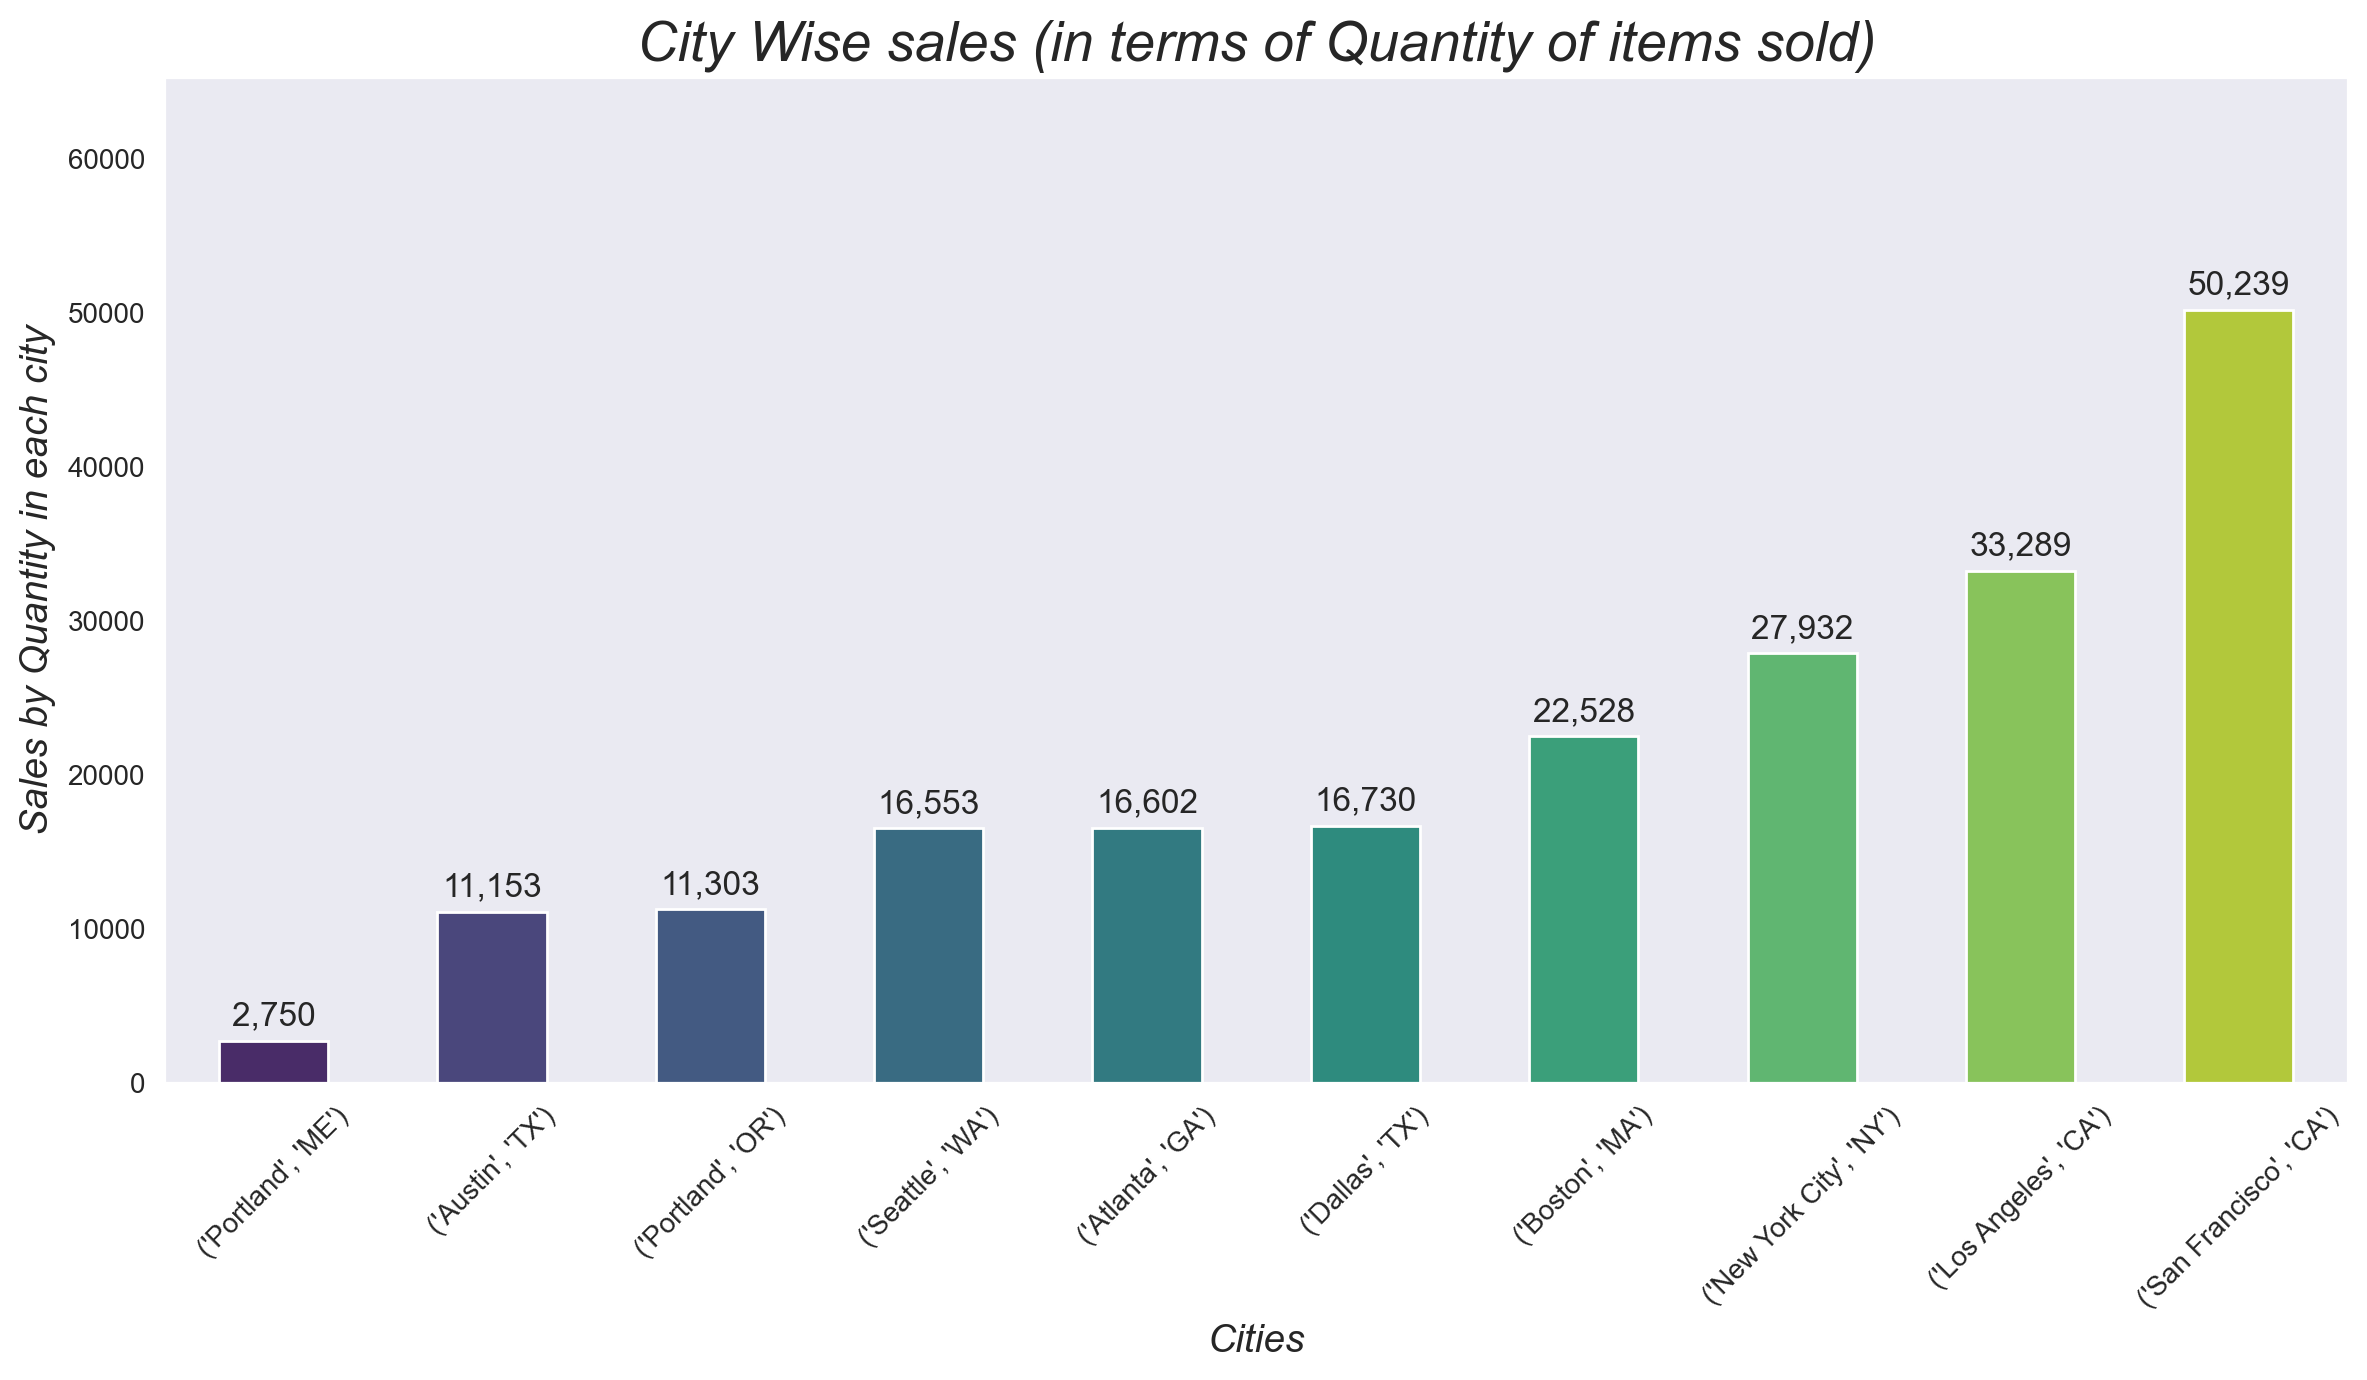

In [12]:
# Sample DataFrame
temporary_storage_3 = pnd.DataFrame(data.groupby(['City','State'])['Quantity_Ordered'].sum()).sort_values('Quantity_Ordered')

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)


# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_3['Quantity_Ordered'].max() * 1.3) 


barplot = sns.barplot(x = pnd.DataFrame(temporary_storage_3.index)[0].astype("string"), y = temporary_storage_3['Quantity_Ordered'].values, palette=random.choice(all_palettes), width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_3["Quantity_Ordered"].values):
    barplot.text(index, value+1000, f'{value:,}', ha="center", fontsize=12)


# Adding labels and title
plt.xlabel("Cities", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("Sales by Quantity in each city", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("City Wise sales (in terms of Quantity of items sold)", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [City Wise Sales w.r.t Quantity]

`After looking at the time series distribution of sales with respect to Quantity of items and revenue generated, the above graph visualises the demographic sales with respect to quantity of items sold in each city, presented in order of Quantity of sales from Lowest to Highest in respective cities.
There can be certain factors so as to why sales in one particular region is higher compared to sales in some other city. For example, in the above illustration, San Francisco, California had the highest number of sales while Portland Maine, had the lowest mostly due to the reason that Population of Portland, Maine is one tenth of the population of San Francisco, California.`

------------------------------------------------
# VIZ 4
##### Visualising Sales State Wise (w.r.t quantity of items)
------------------------------------------------

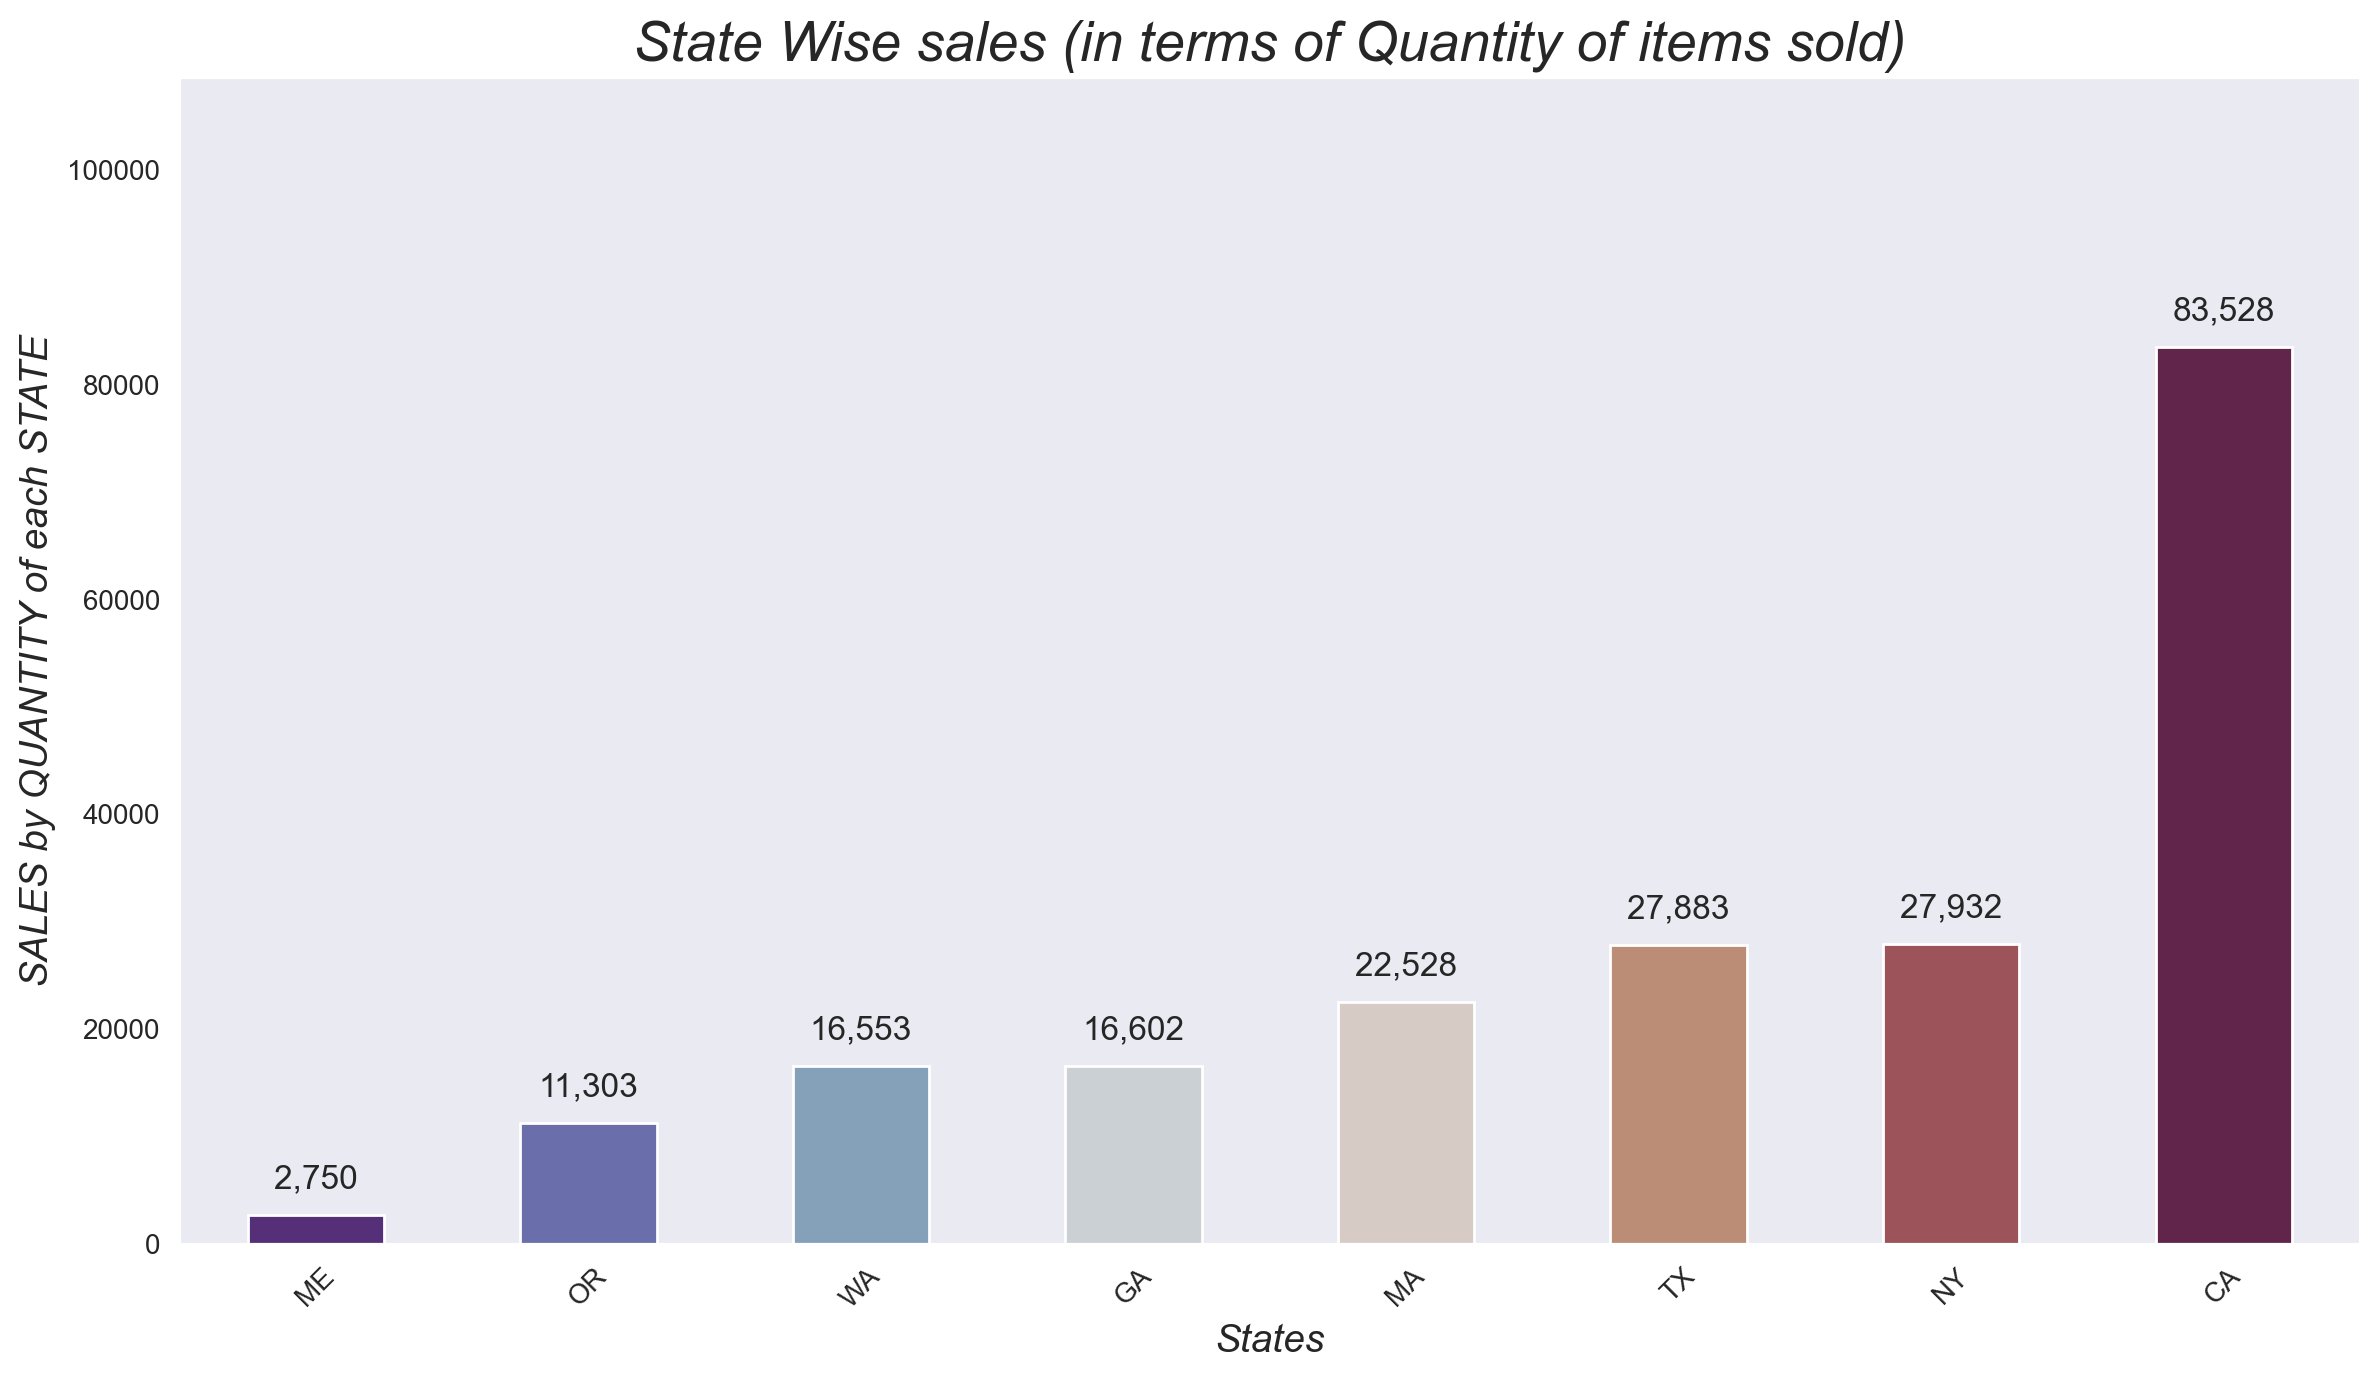

In [13]:
# Sample DataFrame
temporary_storage_4 = pnd.DataFrame(data.groupby('State')['Quantity_Ordered'].sum()).sort_values('Quantity_Ordered')

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)


# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_4['Quantity_Ordered'].max() * 1.3) 


barplot = sns.barplot(x = temporary_storage_4.index, y = temporary_storage_4['Quantity_Ordered'].values, palette=random.choice(all_palettes), width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_4["Quantity_Ordered"].values):
    barplot.text(index, value+2500, f'{value:,}', ha="center", fontsize=12)


# Adding labels and title
plt.xlabel("States", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("SALES by QUANTITY of each STATE", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("State Wise sales (in terms of Quantity of items sold)", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [State wise sales w.r.t Quantity]

`Following the region wise manifestations of sales, this bar graph evinces the sales of Quantity of items in each state. California with highest sum and Maine with least. Again certain factors can be taken into consideration, can be viewed from different perspectives that recognition of store is more on the west coast and Northeast Region and less in the central parts of the United States of America`

------------------------------------------------
# VIZ 5
##### Visualising Sales City Wise (w.r.t revenue generated).
------------------------------------------------

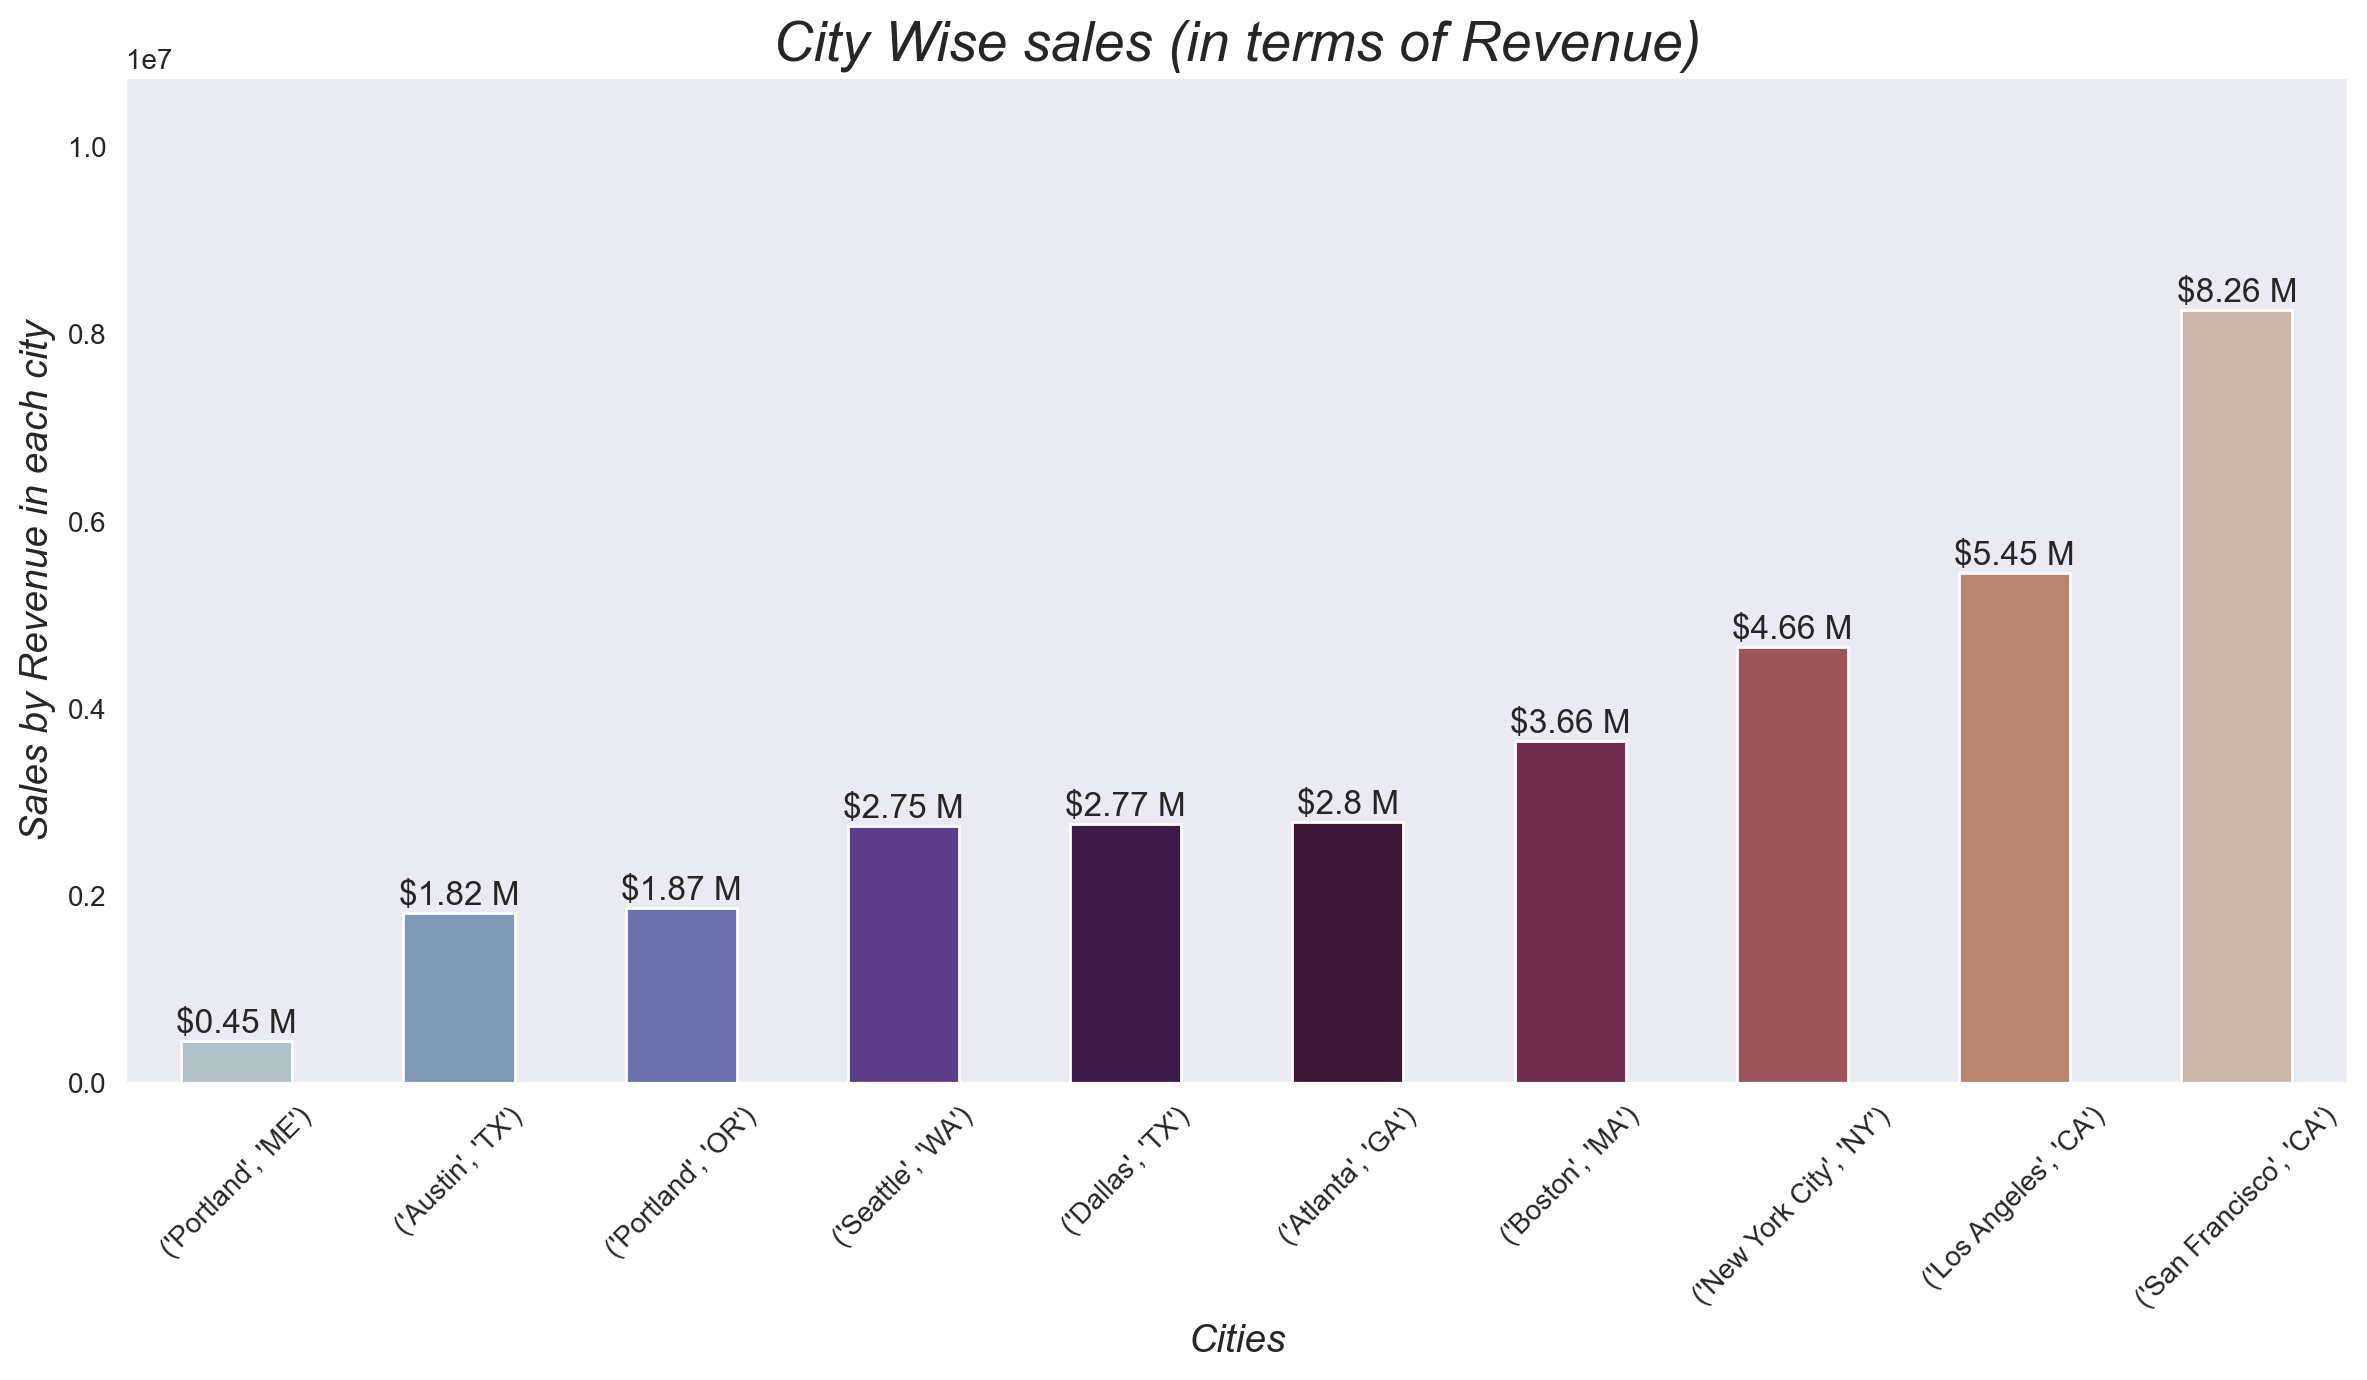

In [14]:
# Sample DataFrame
temporary_storage_5 = pnd.DataFrame(data.groupby(['City','State'])['Revenue'].sum()).sort_values('Revenue')

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)


# Set y-axis limit to the maximum value of temporary_storage_5
plt.ylim(0, temporary_storage_5['Revenue'].max() * 1.3) 


barplot = sns.barplot(x = pnd.DataFrame(temporary_storage_5.index)[0].astype("string"), y = temporary_storage_5['Revenue'].values, palette=random.choice(all_palettes), width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_5["Revenue"].values):
    plt.text(index, value + 10000, "$" + str(round(value/1000000, 2)) + " M", ha='center', va='bottom', fontweight=500, size=12)


# Adding labels and title
plt.xlabel("Cities", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("Sales by Revenue in each city", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("City Wise sales (in terms of Revenue)", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [City wise sales w.r.t Revenue]

`Followed from the above graphs and charts, the revenue genration follows the trends of Quamtity of items sold. The more the number of items being sold, the greater the earnings.` 

------------------------------------------------
# VIZ 6
##### Visualising Sales State wise (w.r.t Revenue Generated)
------------------------------------------------

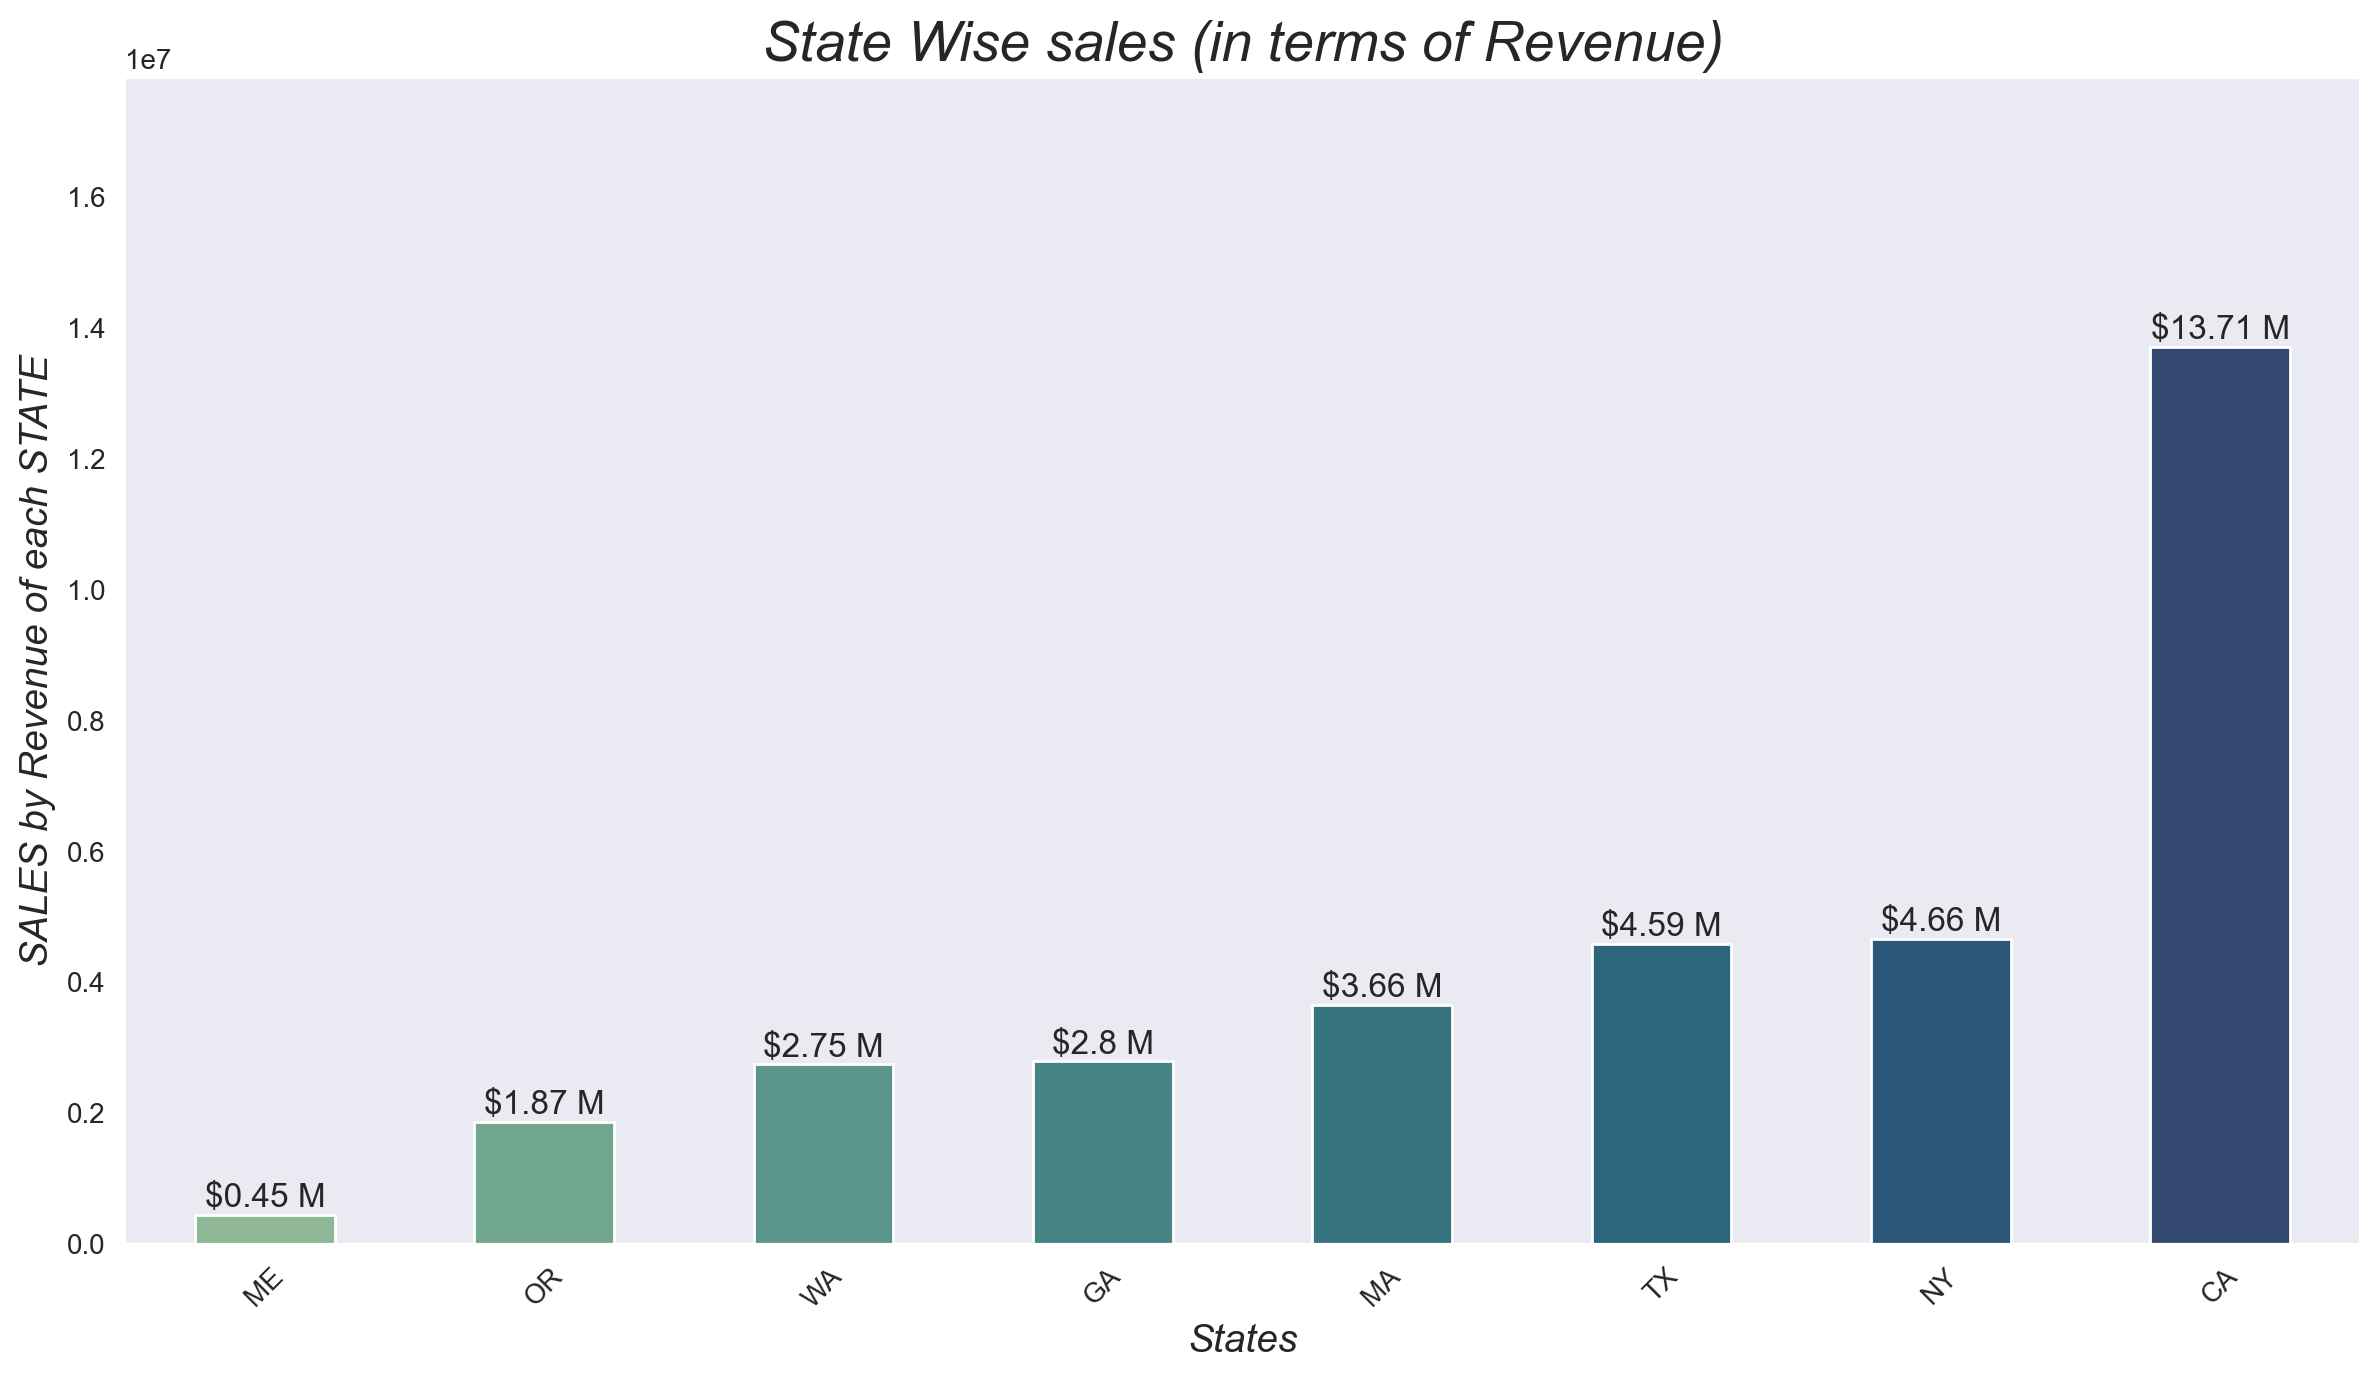

In [15]:
# Sample DataFrame
temporary_storage_6 = pnd.DataFrame(data.groupby('State')['Revenue'].sum()).sort_values('Revenue')

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)


# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_6['Revenue'].max() * 1.3) 


barplot = sns.barplot(x = temporary_storage_6.index, y = temporary_storage_6['Revenue'].values, palette=random.choice(all_palettes), width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_6["Revenue"].values):
    plt.text(index, value + 10000, "$" + str(round(value/1000000, 2)) + " M", ha='center', va='bottom', fontweight=500, size=12)



# Adding labels and title
plt.xlabel("States", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("SALES by Revenue of each STATE", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("State Wise sales (in terms of Revenue)", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


## Inference [State wise sales w.r.t Revenue]

`Followed from the above graphs and charts, the revenue genration follows the trends of Quamtity of items sold. The more the number of items being sold, the greater the earnings.` 

------------------------------------------------
# VIZ 7
##### Visualising top ten products based on the sales.
------------------------------------------------

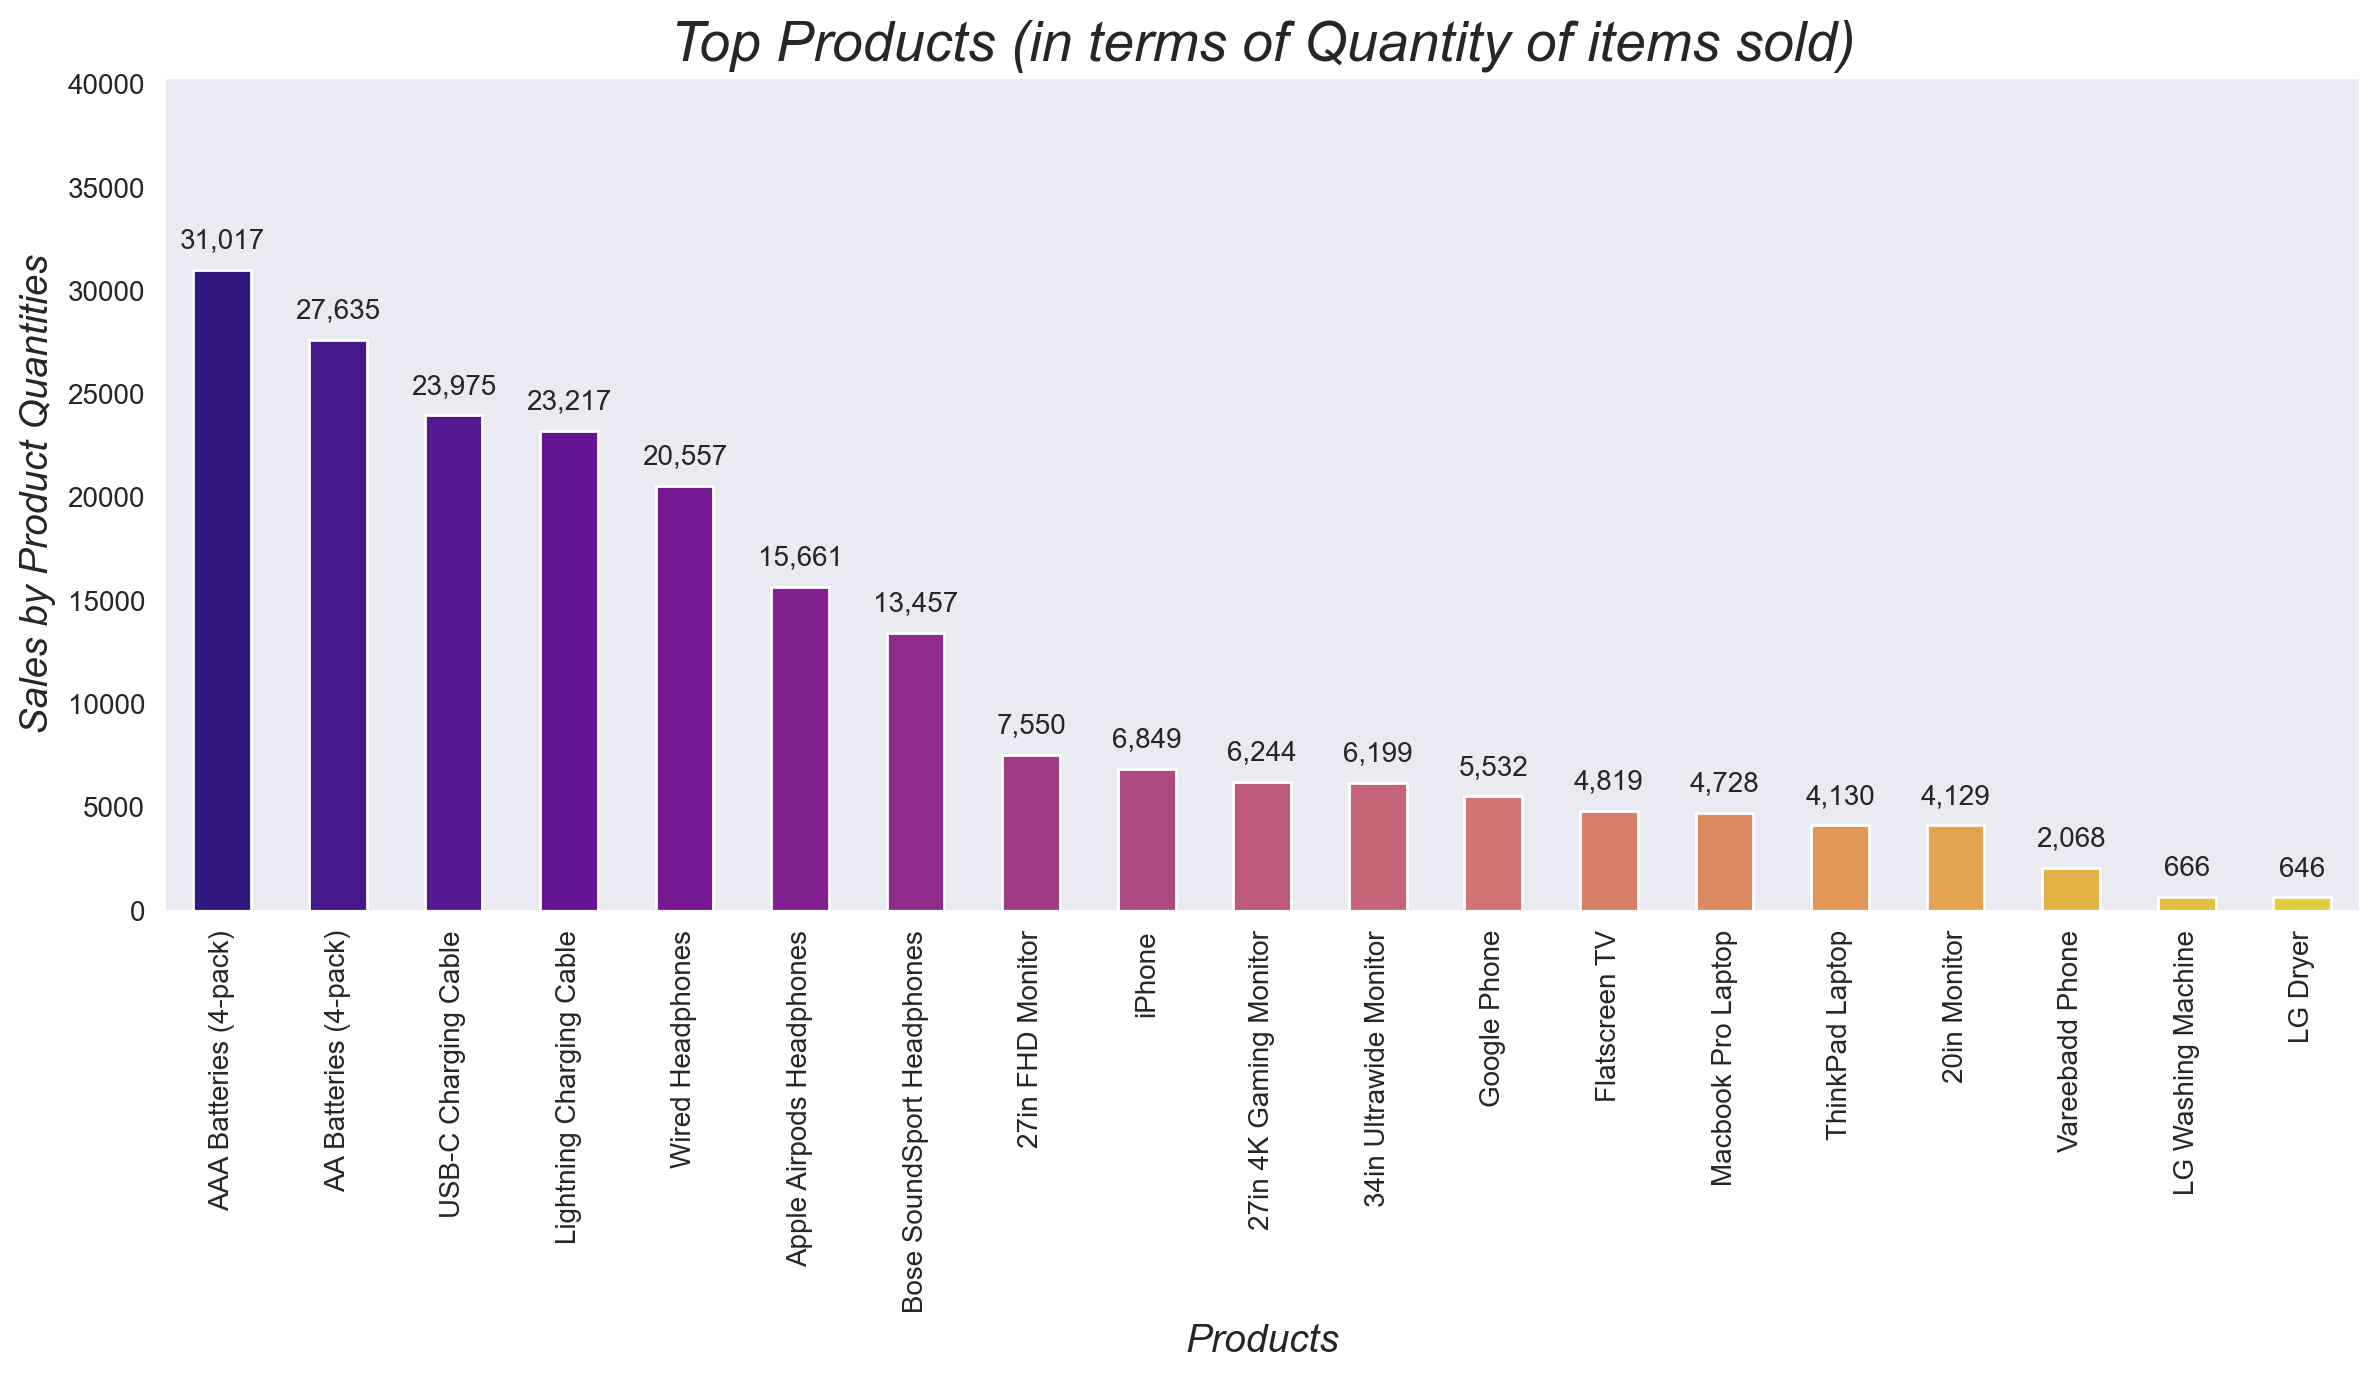

In [16]:
# Sample DataFrame
temporary_storage_7 = pnd.DataFrame(data.groupby('Product')['Quantity_Ordered'].sum()).sort_values(by=["Quantity_Ordered"],ascending=False)

# Set style
sns.set_style("dark")

# Create plot
plt.figure(figsize=(12, 7), dpi= runtimeDPI)


# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, temporary_storage_7['Quantity_Ordered'].max() * 1.3) 


barplot = sns.barplot(x = temporary_storage_7.index, y = temporary_storage_7['Quantity_Ordered'].values, palette=random.choice(all_palettes), width=0.5)

# Adding values on top of bars
for index, value in enumerate(temporary_storage_7["Quantity_Ordered"].values):
    barplot.text(index, value+1000, f'{value:,}', ha="center", fontsize=10)


# Adding labels and title
plt.xlabel("Products", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.ylabel("Sales by Product Quantities", fontdict={'fontweight': 500, 'size': 14, 'fontstyle': 'italic'})
plt.title("Top Products (in terms of Quantity of items sold)", fontdict={'fontweight': 200, 'size': 20, 'fontstyle': 'italic'})

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)


# Adjusting layout
plt.tight_layout()

# Display plot
plt.show()


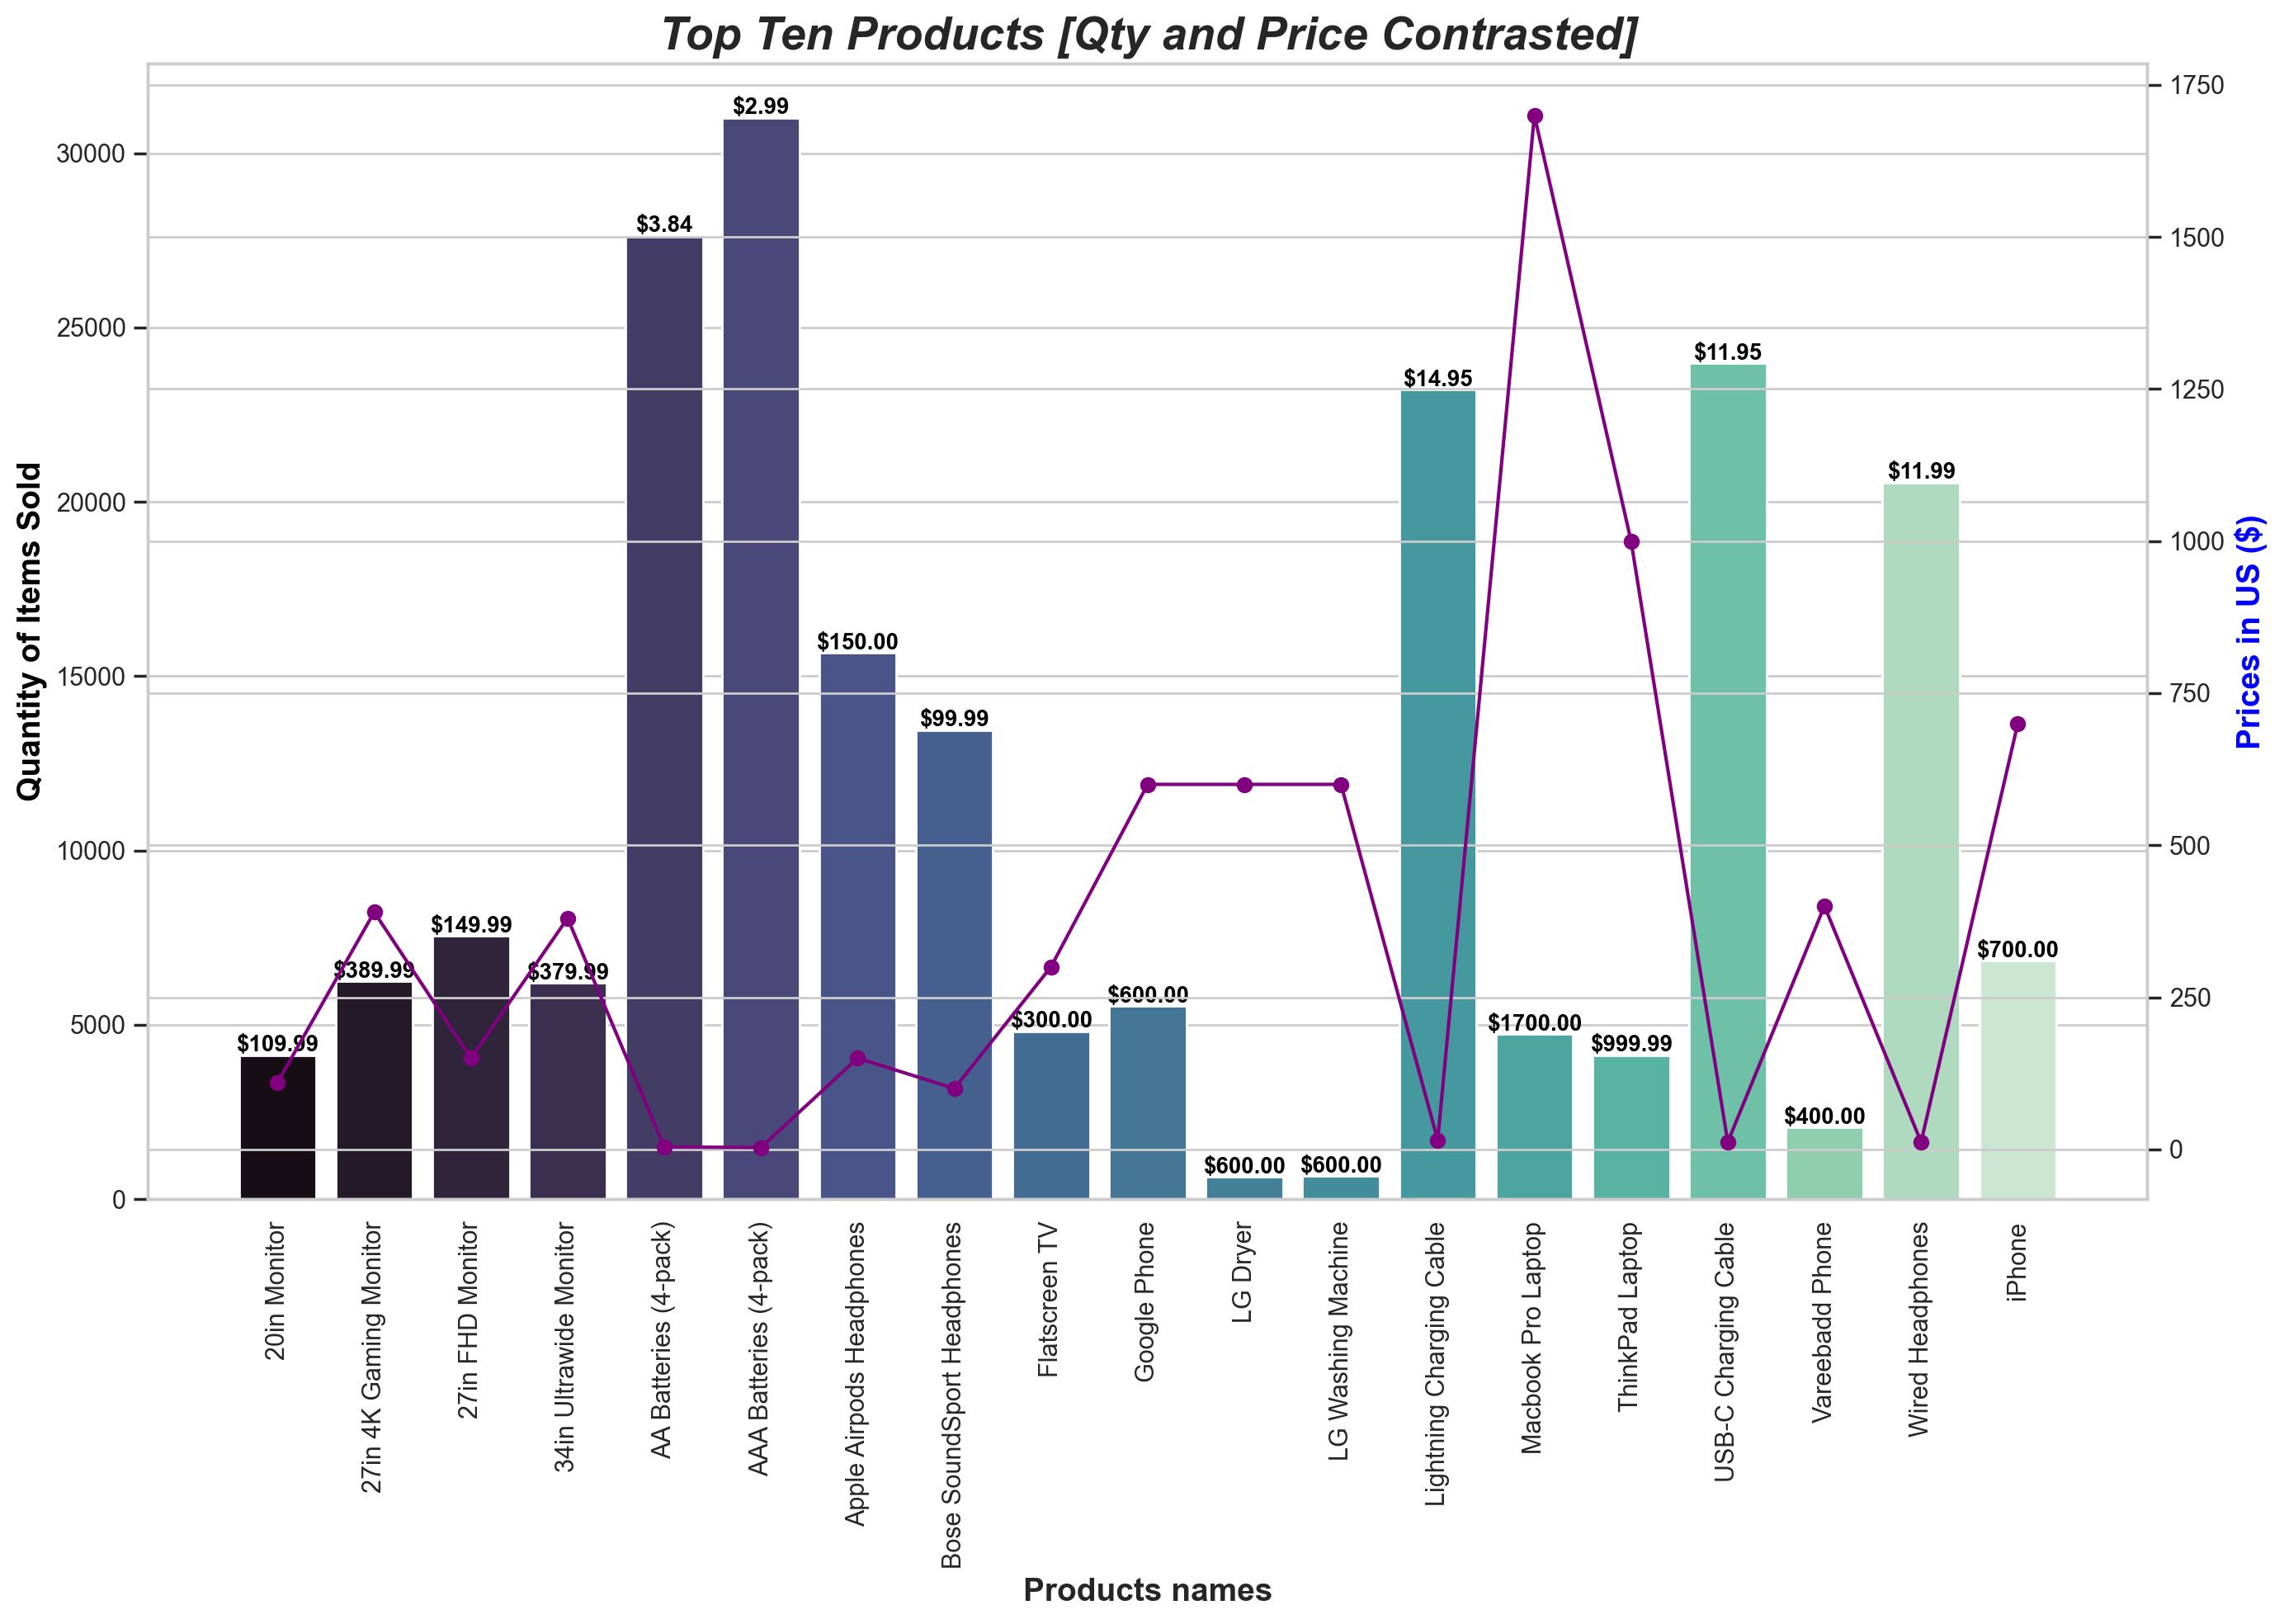

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data and plotting code
temporary_storage_7_1 = pd.DataFrame(data.groupby('Product')['Quantity_Ordered'].sum())
prices = data.groupby("Product")["Price_Each"].mean()

# Setting up the plot
sns.set(style="whitegrid")  # Set the style

# Create figure with increased DPI
plt.figure(figsize=(14, 10),dpi=runtimeDPI)

# Create axis objects
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting the data
sns.barplot(x=temporary_storage_7_1.index, y="Quantity_Ordered", data=temporary_storage_7_1, ax=ax1, palette=random.choice(all_palettes))
ax2.plot(temporary_storage_7_1.index, prices, color='purple', marker='o')

# Set labels and title
ax1.set_xlabel("Products names", fontsize=14, fontweight='bold')
ax1.set_ylabel("Quantity of Items Sold", fontsize=14, fontweight='bold', color='black')
ax2.set_ylabel("Prices in US ($)", fontsize=14, fontweight='bold', color='blue')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(temporary_storage_7_1.index, rotation=90)

# Add mean price on top of each bar
for i, bar in enumerate(ax1.patches):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 100,  # Adjust the position for the text
        f"${prices[i]:.2f}", 
        ha='center', 
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Title
plt.title("Top Ten Products [Qty and Price Contrasted]", fontsize=20, fontweight='bold', style='italic')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## Inference [Top ten Products]

`The above two Graphs solely represent the best selling products. The first graph represents the best products being sold based on the quantity of product sold, in order of higest to lowest. The second graph evinces a contrast of the best selling products and their prices, which were not very surprisingly inversely proportional.`

------------------------------------------------
# VIZ 8
##### At what time of the day, Maximum Orders are placed?
------------------------------------------------

In [18]:

def findIntermediateColor(clr1:str, clr2:str):
    color1 = mcolors.hex2color(clr1)
    color2 = mcolors.hex2color(clr2)
    intermediate_color = [
        (color1[i] + color2[i]) / 2 for i in range(3)
    ]
    return mcolors.rgb2hex(intermediate_color)

print(findIntermediateColor(clr1='#9290C3', clr2='#FE5A1C'))
print(findIntermediateColor(clr1='#FE5A1C', clr2='#9290C3'))


#c87570
#c87570


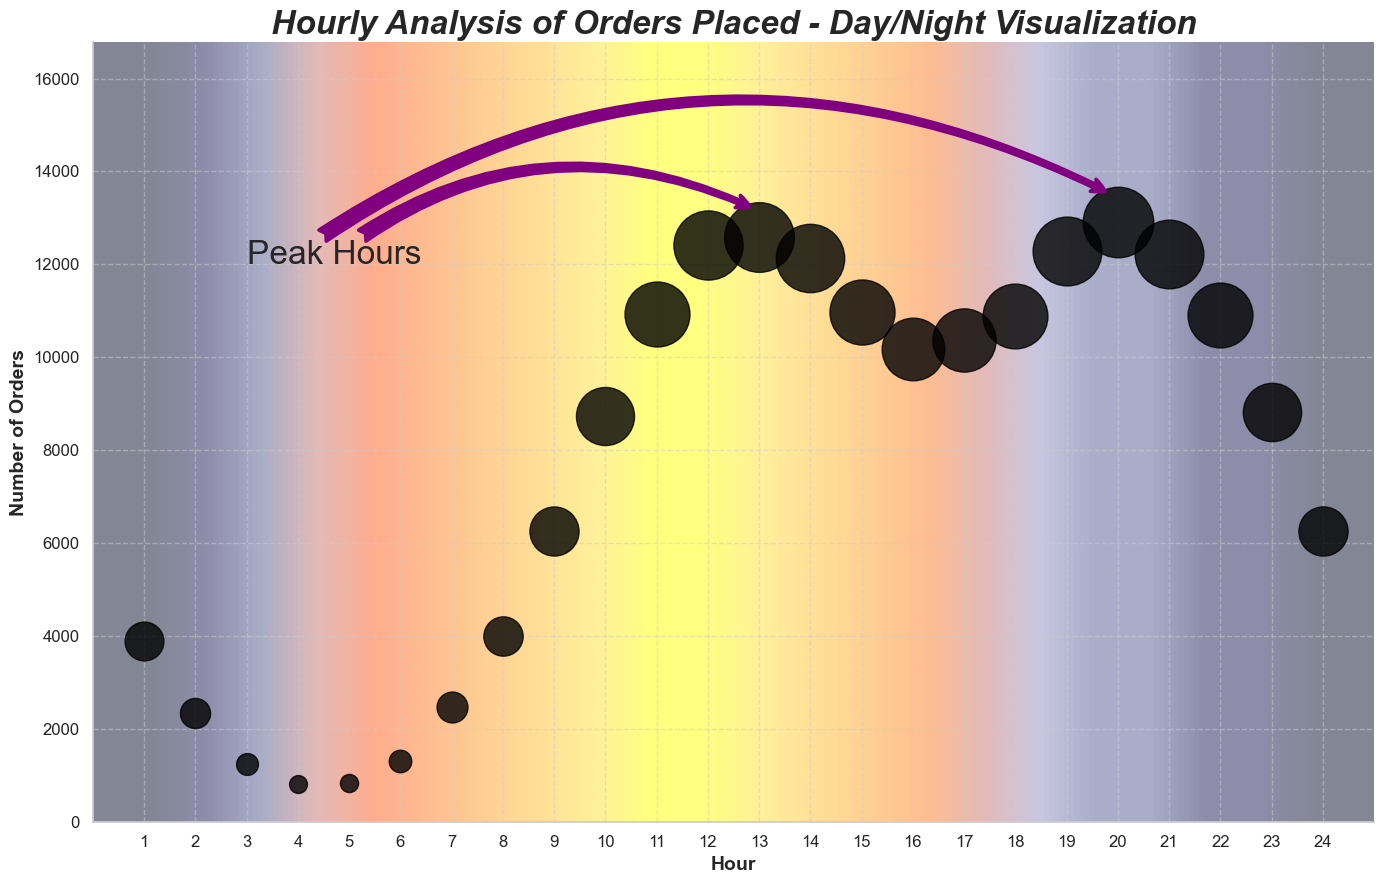

In [19]:
hours = np.arange(1, 25)
orders_count = data.groupby(["Hours"]).count()['Quantity_Ordered']

# Create a custom colormap representing the transition from night to day and back to night


midnight_to_dawn = ['#070F2B', '#070F2B', '#1B1A55', '#535C91', '#c87570']
#dusk_to_midnight= [  '1AM'  ,   '2AM'  ,   '3AM'  ,   '4AM'  ,   '5AM'  ]
dawn_to_dusk = ['#FE5A1C', '#FE7C22', '#FF9E28', '#FFBF2E', '#FFE134', '#FFFF00', '#FFFF00', '#FFE134', '#FFBF2E', '#FF9E28', '#FE7C22', '#c87570' ]
#dawn_to_dusk= [  '5AM'  ,   '6AM'  ,   '7AM'  ,   '8AM'  ,   '9AM'  ,  '10AM'  ,  '11AM'  ,   '1PM'  ,   '2PM'  ,   '3PM'  ,   '4PM'  ,  '5PM'   ]
dusk_to_midnight = ['#9290C3', '#535C91', '#535C91', '#1B1A55', '#1B1A55', '#070F2B', '#070F2B']
#dusk_to_midnight= [  '6PM'  ,   '7PM'  ,   '8PM'  ,   '9PM'  ,  '10PM'  ,  '11PM'  ,  '12PM'  ]
colors = midnight_to_dawn + dawn_to_dusk + dusk_to_midnight

cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(14, 9))

# Set y-axis limit to the maximum value of temporary_storage_3
plt.ylim(0, orders_count.max() * 1.3) 
plt.xlim(0, 25) 

# Plotting the scatter plot with the number of orders as the size of the dots
for hour, orders in zip(hours, orders_count):
    ax.scatter(hour, orders, s=orders*0.2, color='black', alpha=0.8)  # Adjust the scaling factor as needed

# Customizing ticks, grid, and labels
ax.set_xticks(hours)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Hourly Analysis of Orders Placed - Day/Night Visualization", fontsize=24, fontweight='bold', style='italic')
ax.set_xlabel("Hour", fontsize=14, fontweight='bold')
ax.set_ylabel("Number of Orders", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Creating a gradient background representing the transition from night to day and back to night
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plotting the gradient background
ax.imshow(gradient, aspect='auto', cmap=cmap, extent=(0, 25, 0, orders_count.max()*1.3), alpha=0.5)

# Adding some decorative elements
# ax.text(12, 200, "Stunning Hourly Orders Visualization", fontsize=20, color='black', ha='center', va='center')
ax.annotate("Peak Hours", xy=(13/1.01, orders_count[12]*1.05), xytext=(3, 12000), fontsize=24,
             arrowprops=dict(facecolor='black', arrowstyle='fancy', connectionstyle='arc3,rad=-.3', color='purple', linewidth=2.5))
ax.annotate("          ", xy=(20/1.01, orders_count[19]*1.05), xytext=(3, 12000), fontsize=24,
             arrowprops=dict(facecolor='black', arrowstyle='fancy', connectionstyle='arc3,rad=-.3', color='purple', linewidth=2.5))

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


## Inference [Time of Sales or Order placed]

`The above pictorial presentaion inferences the specific time during the day when oreder is placed. It can be perceived that the maximum amount of orders come in during the 13th hour of the day and the 20th hour of the day. Mostly can be generalised as the lunch break hours and the stereotypical conventional after office hours, when people take a break from their busy schedules, take minds off their works and find recreation in online shopping.`

------------------------------------------------
# VIZ 9
##### Products that are often sold Together.(incombinations of 2)
------------------------------------------------

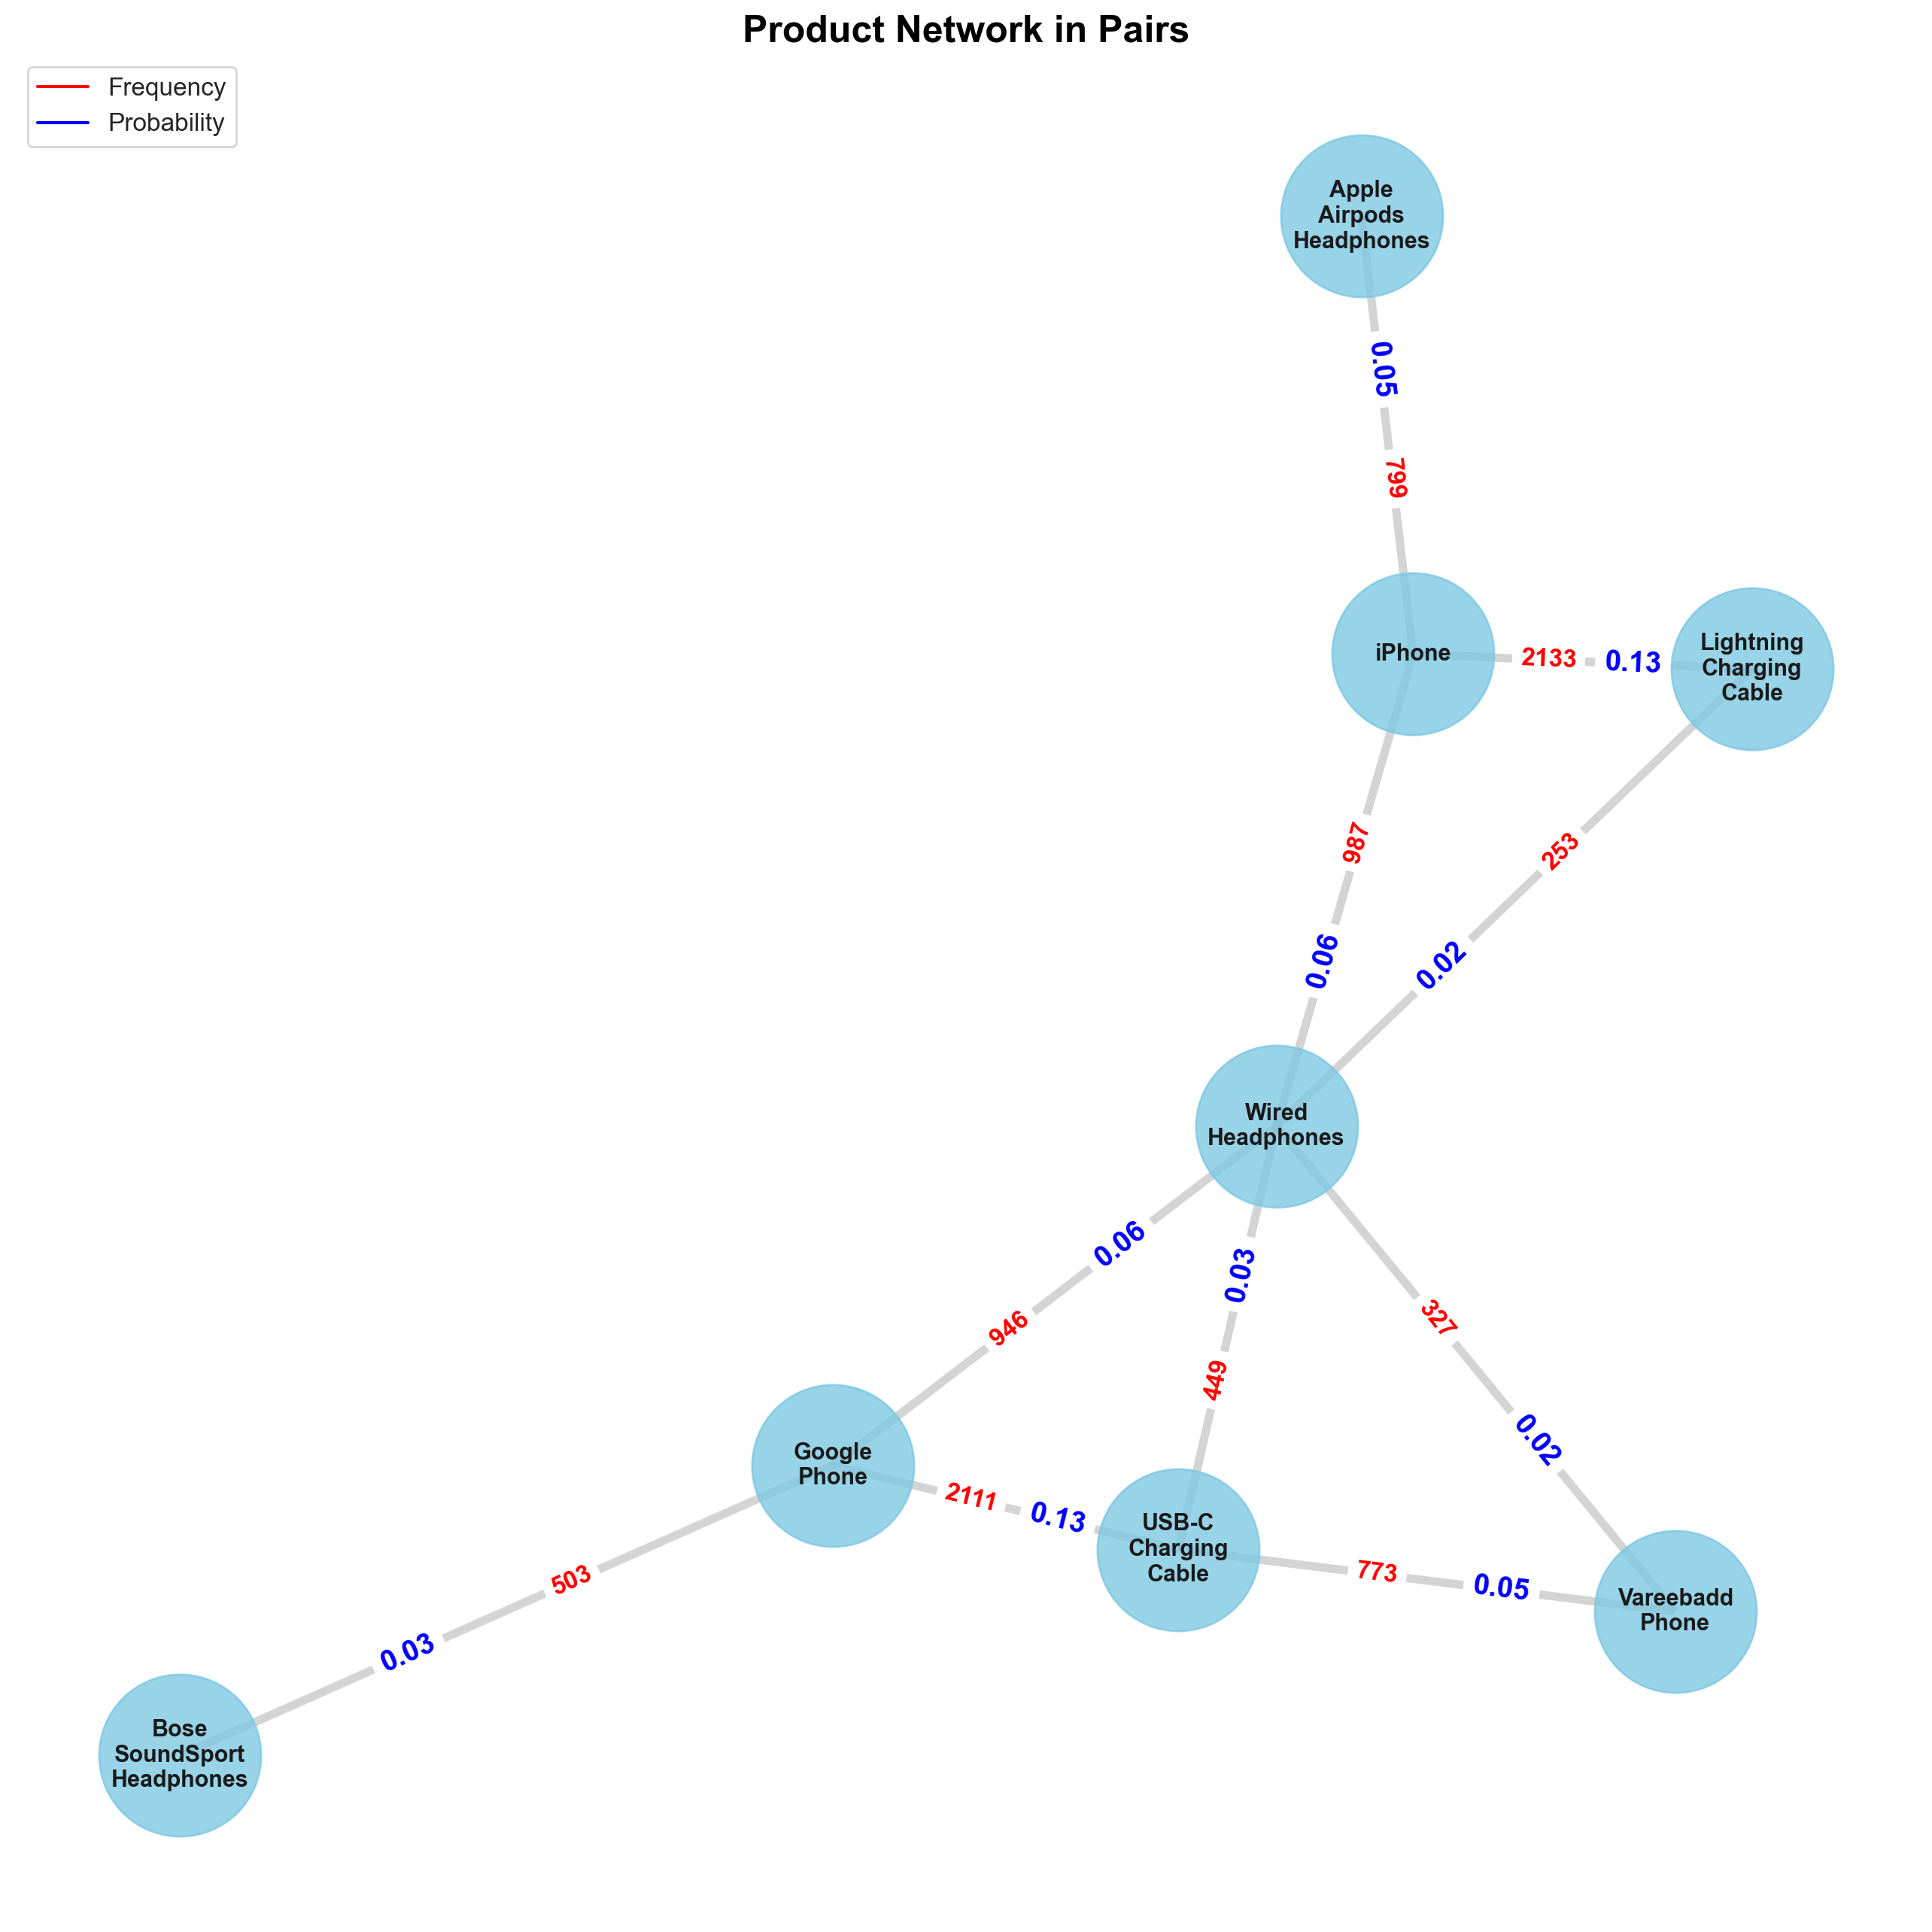

In [20]:
def buildDict(clm):
    returndct = dict()
    for tup in clm:
        for word in tup:
            returndct.setdefault(word, word.replace(" ", "\n"))

    return returndct

# Your original data and processing code
temporary_storage_8 = data[data.duplicated(subset=["Order_ID"], keep=False)]
temporary_storage_8['Product'] = temporary_storage_8.groupby(['Order_ID'])['Product'].transform(lambda x: ','.join(x))
temporary_storage_8 = temporary_storage_8.drop_duplicates()

cnt = Counter()
for cmb in temporary_storage_8["Product"]:
    lst_of_cmb = cmb.split(",")
    cnt.update(Counter(combinations(lst_of_cmb, 2)))

temporary_storage_8_1 = pd.DataFrame(cnt.most_common(10))
item_emojis = buildDict(temporary_storage_8_1[0])

# Calculate the total number of transactions
total_transactions = sum(cnt.values())

# Calculate the probability of purchasing one product given the other
edge_probabilities = {edge: round(freq / total_transactions, 2) for edge, freq in cnt.items()}
# underLine = lambda dct: {key: '\033[4m' + str(value) + '\033[0m' for key, value in dct.items()}


# Create a graph
G = nx.Graph()

for index, row in temporary_storage_8_1.iterrows():
    G.add_edge(item_emojis[row[0][0]], item_emojis[row[0][1]], weight=row[1], probability=edge_probabilities[row[0]])

# Draw the graph
plt.figure(figsize=(13, 13), dpi=runtimeDPI)

# Customize node and edge appearance
# pos = nx.circular_layout(G)
pos = nx.spring_layout(G, seed=42, k=2)
nx.draw_networkx_nodes(G, pos, node_size=6000, node_color='#7EC8E3', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='#AAAAAA', width=4, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold', font_family='Arial')

# Add edge labels for weight
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels=edge_labels, font_color='red', font_weight='bold', label_pos=0.6)

# Add edge labels for probability
probability_labels = nx.get_edge_attributes(G, 'probability')
nx.draw_networkx_edge_labels(G, pos, font_size=14, edge_labels=probability_labels, font_color='blue', font_weight='bold', label_pos=0.35)


# Add legend
red_patch = plt.Line2D([], [], color='red', marker='', markersize=10, label='Frequency')
blue_patch = plt.Line2D([], [], color='blue', marker='', markersize=10, label='Probability')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', fontsize=12)
plt.title("Product Network in Pairs", fontsize=18, fontweight='bold', color='black')
plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a tuple

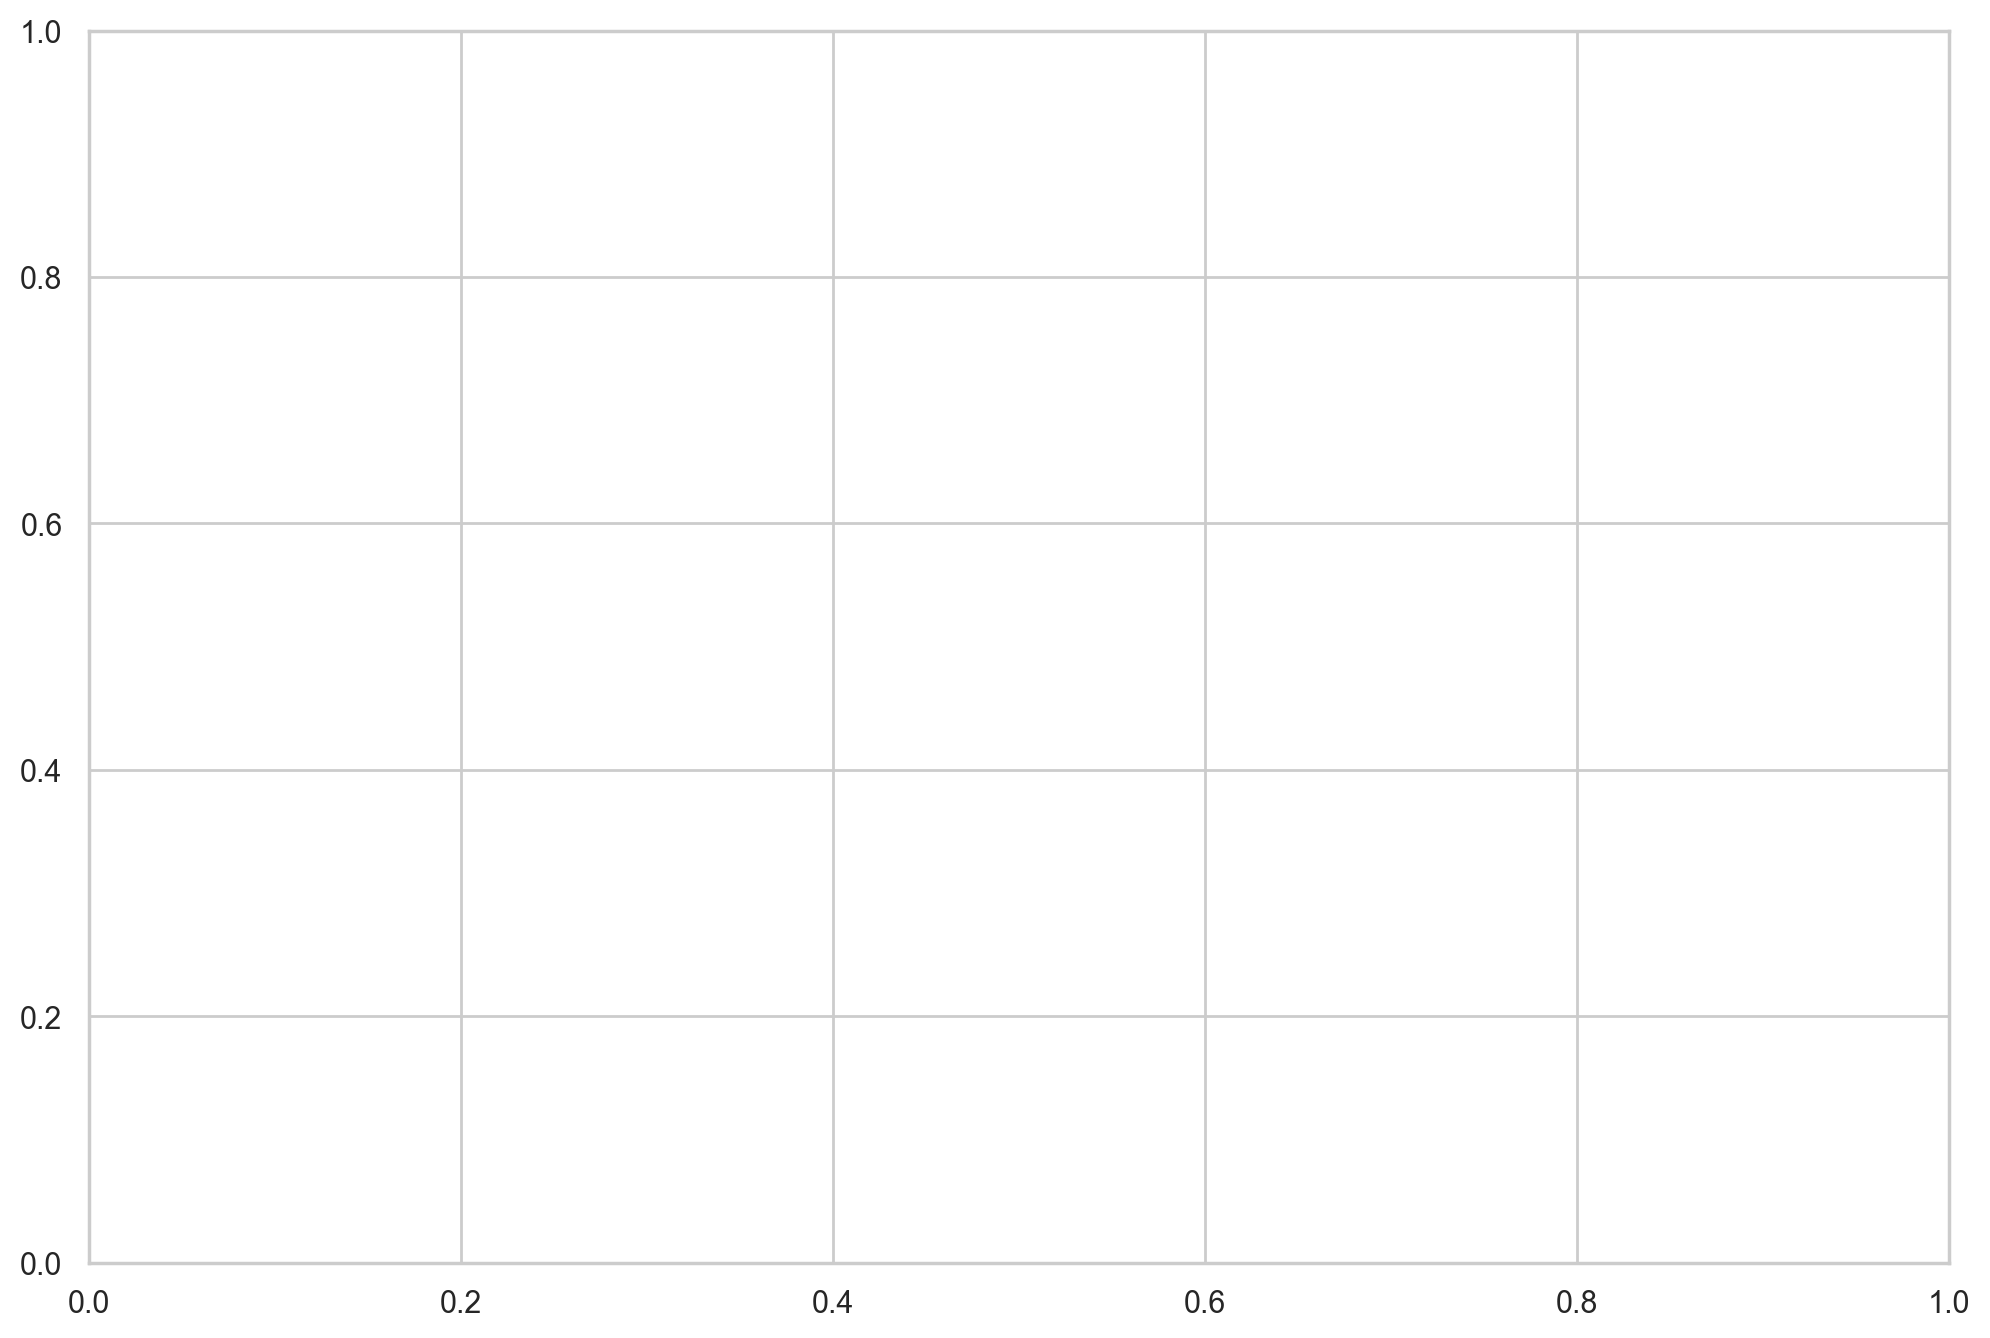

In [21]:
plt.figure(figsize=(12, 8), dpi=runtimeDPI)
plt.barh(temporary_storage_8_1[0][::-1], temporary_storage_8_1[1][::-1], color=plt.cm.viridis_r(temporary_storage_8_1[1] / max(temporary_storage_8_1[1])))
plt.xlabel('Frequency', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Pair of Products', fontsize=14, fontweight='bold', color='black')
plt.title("Top 10 Product Combinations", fontsize=18, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


------------------------------------------------
# VIZ 10
##### Products that are often sold Together.(incombinations of 3)
------------------------------------------------

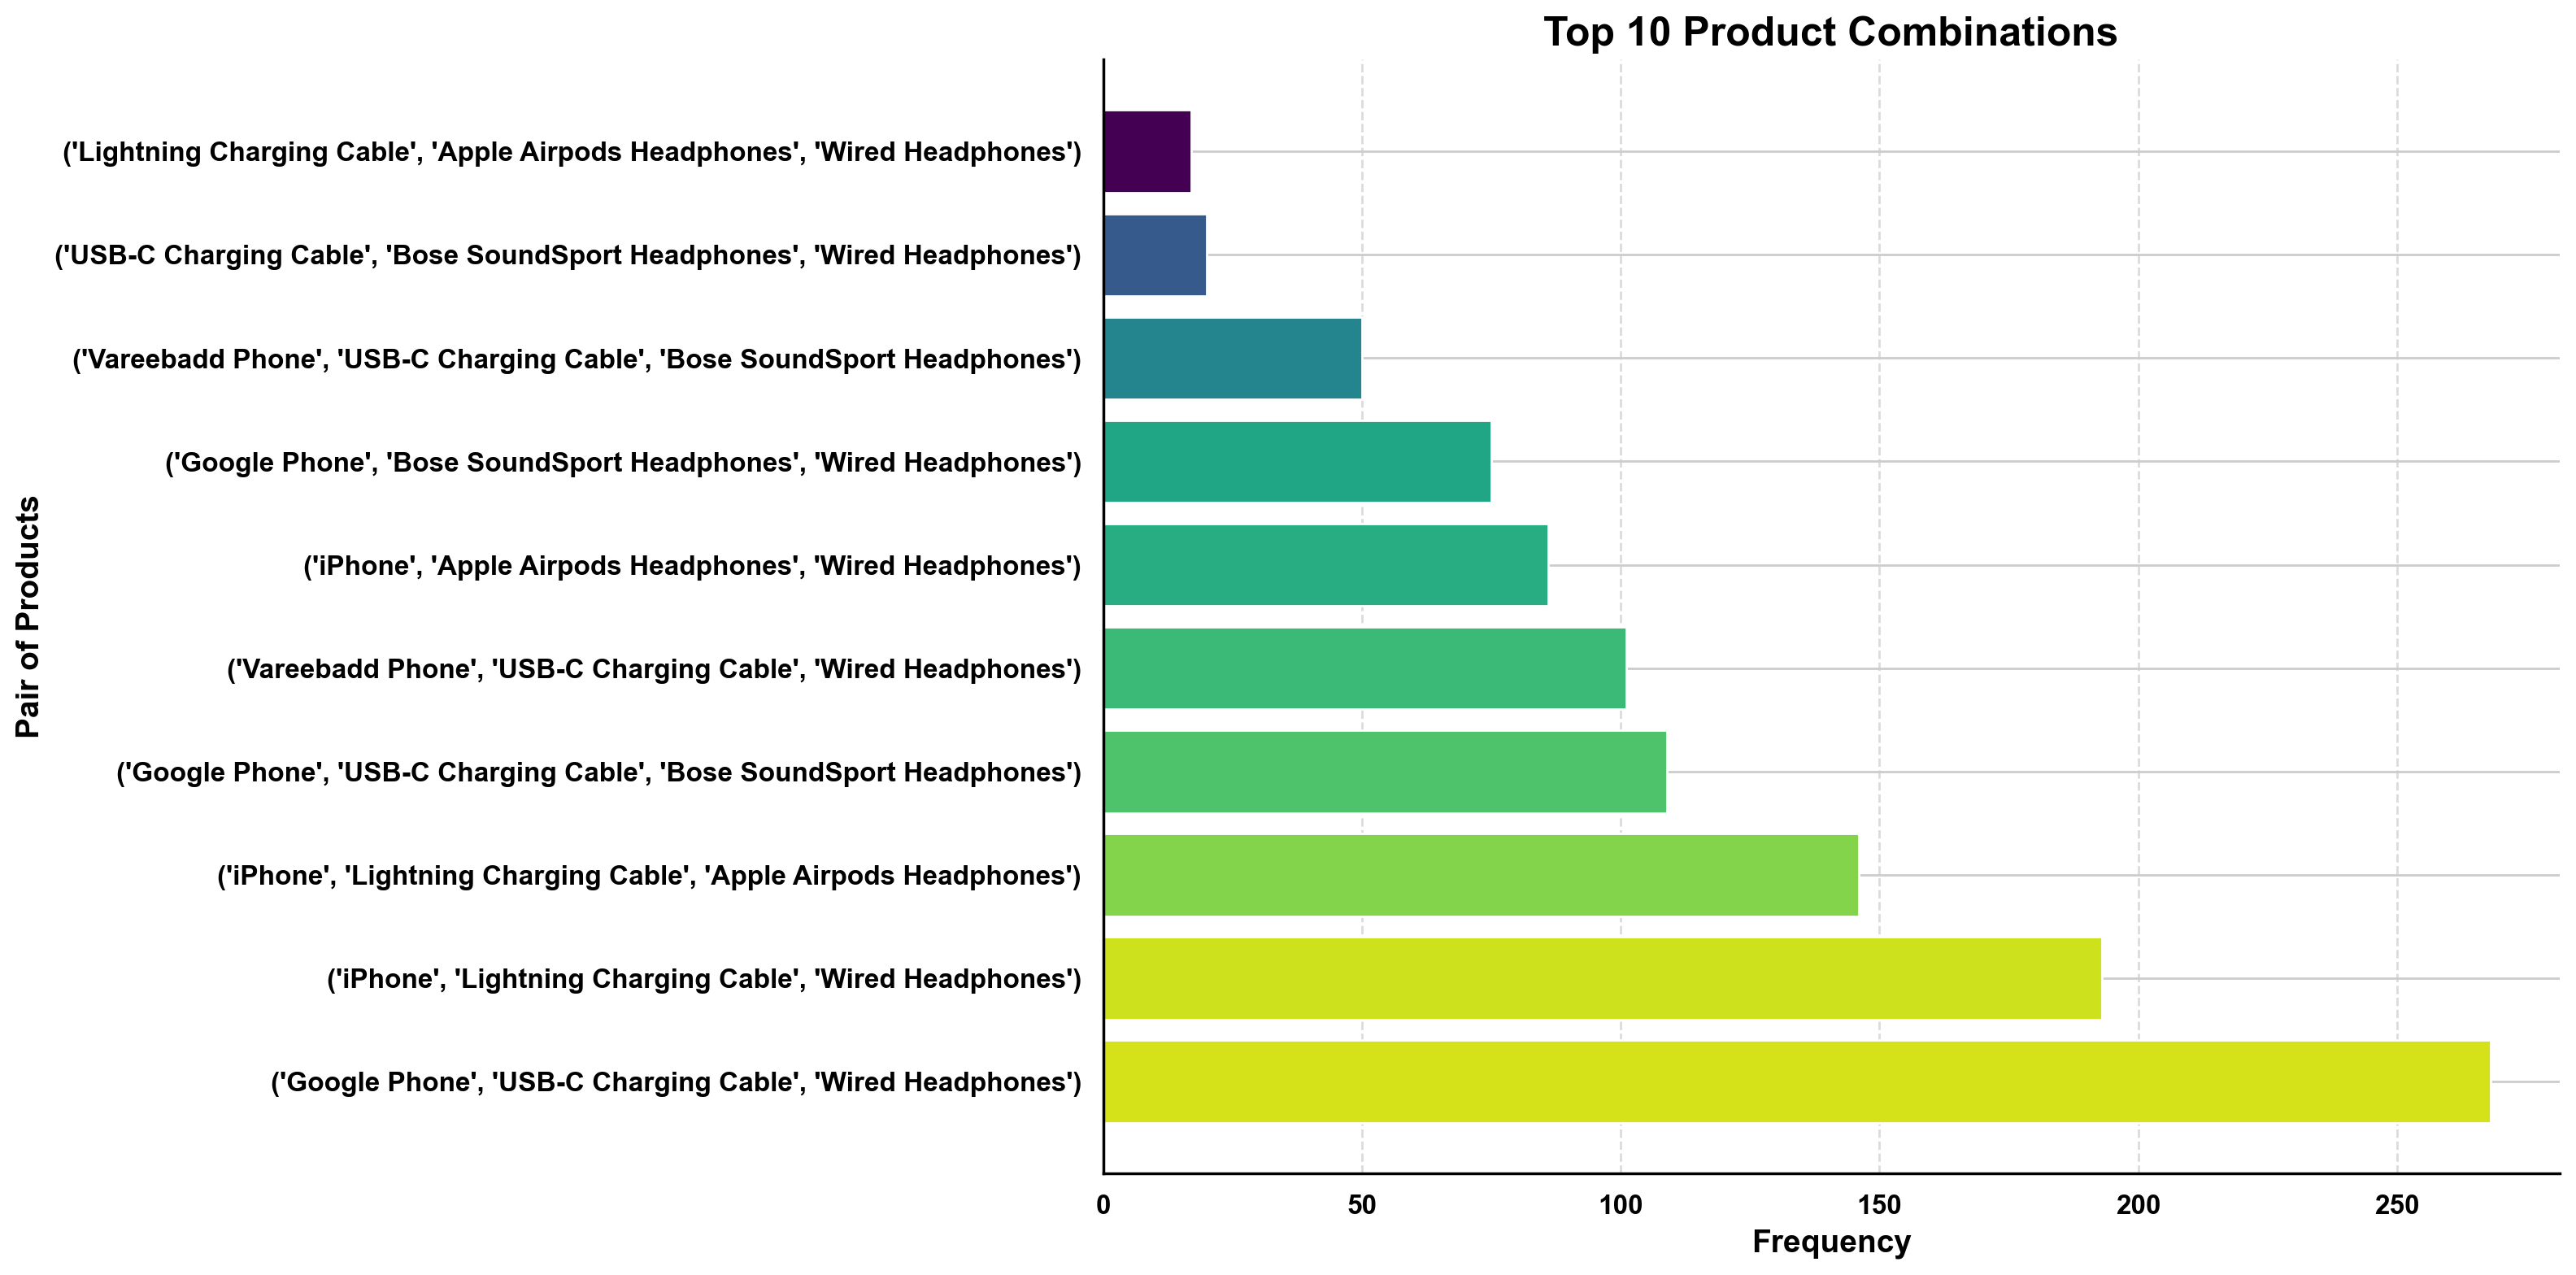

In [ ]:
"""
First we subset the original df by selecting only the duplicated values,
Then we groupby those duplicated values and join their corresponding products in order to form combinations,
Then we drop the duplicates from the fragment that we created.
"""
temporary_storage_8 = data[data.duplicated(subset=["Order_ID"], keep=False)]
temporary_storage_8['Product'] = temporary_storage_8.groupby(['Order_ID'])['Product'].transform(lambda x : ','.join(x))
temporary_storage_8 = temporary_storage_8.drop_duplicates()

cnt = Counter()
for cmb in temporary_storage_8["Product"]:
    lst_of_cmb = cmb.split(",")
    cnt.update(Counter(combinations(lst_of_cmb, 3))) #2 represents the items in pairs of 2 (can be done n frequency)

temporary_storage_8_1 = pnd.DataFrame(cnt.most_common(10))
temporary_storage_8_1[0] = temporary_storage_8_1[0].astype("string")



plt.figure(figsize=(16, 8), dpi=runtimeDPI)
plt.barh(temporary_storage_8_1[0][::-1], temporary_storage_8_1[1][::-1], color=plt.cm.viridis_r(temporary_storage_8_1[1] / max(temporary_storage_8_1[1])))
plt.xlabel('Frequency', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Pair of Products', fontsize=14, fontweight='bold', color='black')
plt.title("Top 10 Product Combinations", fontsize=18, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()



## Inference [Frequently bought together items (in 2's and 3's)]

`The graph above depicts the pairs of products that are always bought together, and is listed in descending order of the number of times the sales happened in pairs. Like for instance, If a customers buys an Iphone, the customer also orders the lightning USB cable along with it. Based on such Observations, if some other customer comes on to the platform to buy an Iphone, the Online Selling Platform will recommend the customer if he/she wants to buy the lightning USB cable also. This will increase the sales as many of the customer base can be recommended items they never knew they needed it in the first place.`